# Table of Contents

[0. Context](#context)<br>

[1. Import the Dataset and Explore the Data](#import-the-dataset-and-explore-the-data)<br>
Check data contents, provide descriptive statistics, and check for incoherencies in the data.<br>
Explore data visually and extract relevant insights.<br>
Explain your rationale and findings.<br>
Do not forget to analyze multivariate relationships.<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.1 Importing Libraries](#11-importing-libraries)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.2 Loading and Reading the Dataset](#12-loading-and-reading-the-dataset)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.3 Descriptive Statistics](#13-descriptive-statistics)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.4 Incoherencies](#14-incoherencies)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.5 Exploring Data Visually](#15-exploring-data-visually)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.6 Pair-wise Relationships](#16-pair-wise-relationships)<br>

[2. Clean and Pre-process the Data](#clean-and-pre-process-the-data)<br>
Are there any missing values? Take action to handle them.<br>
Check the dataset for outliers and pre-process them. Justify your decisions.<br>
Deal with categorical variables.<br>
Review current features and create extra features if needed. Explain your steps.<br>
Perform data scaling. Explain the reasoning behind your choices.<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.1 Missing Values](#21-missing-values)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.2 Duplicates](#22-duplicates)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.3 Outliers](#23-outliers)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.4 Categorical Data](#24-categorical-data)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.5 Aggregations](#25-aggregations)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.6 Feature Engineering](#26-feature-engineering)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.7 Multivariate Relationships](#27-multivariate-relationships)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.8 Data Scaling](#28-data-scaling)<br>

[3. Feature Selection](#feature-selection)<br>
Define and implement an unambiguous strategy for feature selection.<br>
Use methods discussed in the course.<br>
Present and justify your final selection.<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.1 Filter Methods](#31-filter-methods)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.1 Univariate Variables](#311-univariate-variables)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.2 Correlation Indices](#312-correlation-indices)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.3 Chi-Square](#313-chi-square)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.2 Wrapper Methods](#32-wrapper-methods)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

# 0. Context <a name="0-context"></a>

The New York Workers’ Compensation Board (WCB) administers and regulates workers’ compensation, disability, and other workers’ benefits. <br>
**WCB is responsible for assembling and deciding on claims whenever it becomes aware of a workplace injury**. Since 2000, the WCB has assembled and reviewed more than 5 million claims. However, manually reviewing all claims is an arduous and time-consuming process. For that reason, the WCB has reached out to Nova IMS to assist them in the creation of a model that can automate the decision-making whenever a new claim is received. <br>

Our task is to create a classification model that can accurately predict the WCB’s final decision on what type o 
injury (Claim Injury Type) should be given to a caim.l To do that, the
WCB has provided labelled data with all claims assembled between
2020 and 2022 <br>

# Import the Dataset and Explore the Data <a name="import-the-dataset-and-explore-the-data"></a>

## 1.1 Importing Libraries <a name="11-importing-libraries"></a>

### Metadata

**Claim Dates**  
`Accident Date` Injury date of the claim.  
`Assembly Date` The date the claim was first assembled.  
`C-2 Date` Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2).  
`C-3 Date` Date Form C-3 (Employee Claim Form) was received.  
`First Hearing Date` Date the first hearing was held on a claim at a WCB hearing location. A blank date means the claim has not yet had a hearing held.  

**Worker Demographics**  
`Age at Injury` Age of injured worker when the injury occurred.  
`Birth Year` The reported year of birth of the injured worker.  
`Gender` The reported gender of the injured worker.  
`Zip Code` The reported ZIP code of the injured worker’s home address.  

**Claim and Case Information**  
`Alternative Dispute Resolution` Adjudication processes external to the Board.  
`Attorney/Representative` Is the claim being represented by an Attorney?  
`Claim Identifier` Unique identifier for each claim, assigned by WCB.  
`Carrier Name` Name of primary insurance provider responsible for providing workers’ compensation coverage to the injured worker’s employer.  
`Carrier Type` Type of primary insurance provider responsible for providing workers’ compensation coverage.  
`Average Weekly Wage` The wage used to calculate workers’ compensation, disability, or paid leave wage replacement benefits.  

**Location and Region**  
`County of Injury` Name of the New York County where the injury occurred.  
`District Name` Name of the WCB district office that oversees claims for that region or area of the state.  
`Medical Fee Region` Approximate region where the injured worker would receive medical service.  

**Incident and Injury Details**  
`COVID-19 Indicator` Indication that the claim may be associated with COVID-19.  
`IME-4 Count` Number of IME-4 forms received per claim. The IME-4 form is the “Independent Examiner's Report of Independent Medical Examination” form.  

**Industry Classification**  
`Industry Code` NAICS code and descriptions are available at https://www.naics.com/search-naics-codes-by-industry/.  
`Industry Code Description` 2-digit NAICS industry code description used to classify businesses according to their economic activity.  

**Injury Descriptions and Codes**  
`OIICS Nature of Injury Description` The OIICS nature of injury codes & descriptions are available at https://www.bls.gov/iif/oiics_manual_2007.pdf.  
`WCIO Cause of Injury Code` The WCIO cause of injury codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pdf.  
`WCIO Cause of Injury Description` See description of field above.  
`WCIO Nature of Injury Code` The WCIO nature of injury codes are available at https://www.wcio.org/Active%20PNC/WCIO_Nature_Table.pdf.  
`WCIO Nature of Injury Description` See description of field above.  
`WCIO Part Of Body Code` The WCIO part of body codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Part_Table.pdf.  
`WCIO Part Of Body Description` See description of field above.  

**Claim Outcomes**  
`Agreement Reached` Binary variable: Yes if there is an agreement without the involvement of the WCB; otherwise unknown at the start of a claim.  
`WCB Decision` Multiclass variable: Decision of the WCB relative to the claim; "Accident" indicates a workplace accident, and "Occupational Disease" indicates illness from the workplace, both of which require WCB deliberation and may be unknown at the claim's start.  
`Claim Injury Type` Main target variable: Deliberation of the WCB relative to benefits awarded to the claim, with numbering indicating severity.  
aim, with numbering indicating severity. <br>  

In [1]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, RobustScaler, StandardScaler

from math import ceil
from sklearn.metrics import (classification_report, confusion_matrix, f1_score, accuracy_score, roc_auc_score, 
                             precision_score, recall_score, make_scorer, silhouette_score)
from sklearn.model_selection import (train_test_split, RepeatedStratifiedKFold, StratifiedKFold, 
                                     GridSearchCV, RandomizedSearchCV)
from sklearn.feature_selection import SelectKBest, f_classif, RFE, mutual_info_classif
from sklearn.linear_model import LassoCV, SGDClassifier, LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, 
                              HistGradientBoostingClassifier, StackingClassifier, VotingClassifier)
from sklearn.utils import class_weight
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from openpyxl import load_workbook
from imblearn.over_sampling import SMOTE, SVMSMOTE
from scipy.stats import randint as sp_randint

%config InlineBackend.figure_format = 'retina'

sns.set()

import warnings
warnings.filterwarnings('ignore')

## 1.2 Loading and Reading the Dataset <a name="12-loading-and-reading-the-dataset"></a>

In [2]:
wcb_train = pd.read_csv('train_data.csv', sep = ',', low_memory=False)
pd.set_option('display.max_columns', None)

In [3]:
wcb_test = pd.read_csv('test_data.csv', sep = ',', low_memory=False)
pd.set_option('display.max_columns', None)

In [5]:
wcb_test.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count',
       'Industry Code', 'Industry Code Description', 'Medical Fee Region',
       'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code', 'Number of Dependents'],
      dtype='object')

In [6]:
wcb_train.head(5)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


## 1.3 Descriptive Statistics <a name="13-descriptive-statistics"></a>

#### Shape

In [7]:
wcb_train.shape

(593471, 33)

In [8]:
wcb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

### Any footnotes?

In [9]:
wcb_train.tail(5)
# No, there isn't any

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327160035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,2022-12-13,72.0,N,2022-12-31,N,0.0,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,6165075,2. NON-COMP,SULLIVAN,N,BINGHAMTON,NaN,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,I,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249875936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120584215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593470,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,818961390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
wcb_train.describe(include='object').T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,593471,1096,2020-03-06,1422
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430


In [11]:
wcb_train.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,4.211427e+01,1.425643e+01,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,4.910883e+02,6.092918e+03,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1.886768e+03,4.146444e+02,0.0,1965.0,1977.0,1989.0,2018.0
Claim Identifier,593471.0,2.366760e+07,1.079271e+08,5393066.0,5593414.5,5791212.0,5991000.5,999891667.0
IME-4 Count,132803.0,3.207337e+00,2.832303e+00,1.0,1.0,2.0,4.0,73.0
Industry Code,564068.0,5.864531e+01,1.964417e+01,11.0,45.0,61.0,71.0,92.0
OIICS Nature of Injury Description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WCIO Cause of Injury Code,558386.0,5.438114e+01,2.587428e+01,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,4.101384e+01,2.220752e+01,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,3.973815e+01,2.236594e+01,-9.0,33.0,38.0,53.0,99.0


## 1.4 Incoherencies <a name="14-incoherencies"></a>

In [12]:
wcb_train.dtypes

Accident Date                          object
Age at Injury                         float64
Alternative Dispute Resolution         object
Assembly Date                          object
Attorney/Representative                object
Average Weekly Wage                   float64
Birth Year                            float64
C-2 Date                               object
C-3 Date                               object
Carrier Name                           object
Carrier Type                           object
Claim Identifier                        int64
Claim Injury Type                      object
County of Injury                       object
COVID-19 Indicator                     object
District Name                          object
First Hearing Date                     object
Gender                                 object
IME-4 Count                           float64
Industry Code                         float64
Industry Code Description              object
Medical Fee Region                

### Datatypes:

**Numerical Data: <br>
float -> int** <br>
`Age at Injury` <br>
`Birth Year` <br>
`IME-4 Count`  <br>
`Number of Dependents` <br>
`WCIO Cause of Injury Code` <br>
`WCIO Nature of Injury Code` <br>
`WCIO Part Of Body Code` <br>
`Industry Code` <br>
`Agreement Reached` <br>


**Object -> Dates** <br>
`C-2 Date` <br>
`C-3 Date` <br>
`First Hearing Date` <br>
`Accident Date`  <br>
`Assembly Dates` <br>

### Change in datatypes

**Numeric data from float to integer:**

In [13]:
wcb_float_to_int = [
    'Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents',
    'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 
    'WCIO Part Of Body Code', 'Industry Code', 'Agreement Reached']

for col in wcb_float_to_int:
    if col in wcb_train.columns:
        wcb_train[col] = pd.to_numeric(wcb_train[col], errors='coerce').astype('Int64')
    if col in wcb_test.columns:
        wcb_test[col] = pd.to_numeric(wcb_test[col], errors='coerce').astype('Int64')

**Dates from object to datetime format:**

In [14]:
wcb_train['C-2 Date'] = pd.to_datetime(wcb_train['C-2 Date'], errors='coerce')
wcb_train['C-3 Date'] = pd.to_datetime(wcb_train['C-3 Date'], errors='coerce')
wcb_train['Accident Date'] = pd.to_datetime(wcb_train['Accident Date'], errors='coerce')
wcb_train['First Hearing Date'] = pd.to_datetime(wcb_train['First Hearing Date'], errors='coerce')
wcb_train['Assembly Date'] = pd.to_datetime(wcb_train['Assembly Date'], errors='coerce')

wcb_test['C-2 Date'] = pd.to_datetime(wcb_test['C-2 Date'], errors='coerce')
wcb_test['C-3 Date'] = pd.to_datetime(wcb_test['C-3 Date'], errors='coerce')
wcb_test['Accident Date'] = pd.to_datetime(wcb_test['Accident Date'], errors='coerce')
wcb_test['First Hearing Date'] = pd.to_datetime(wcb_test['First Hearing Date'], errors='coerce')
wcb_test['Assembly Date'] = pd.to_datetime(wcb_test['Assembly Date'], errors='coerce')

In [15]:
wcb_train['Gender'] = wcb_train['Gender'].replace('U', np.nan)
wcb_test['Gender'] = wcb_test['Gender'].replace('U', np.nan)

In [16]:
wcb_train.dtypes

Accident Date                         datetime64[ns]
Age at Injury                                  Int64
Alternative Dispute Resolution                object
Assembly Date                         datetime64[ns]
Attorney/Representative                       object
Average Weekly Wage                          float64
Birth Year                                     Int64
C-2 Date                              datetime64[ns]
C-3 Date                              datetime64[ns]
Carrier Name                                  object
Carrier Type                                  object
Claim Identifier                               int64
Claim Injury Type                             object
County of Injury                              object
COVID-19 Indicator                            object
District Name                                 object
First Hearing Date                    datetime64[ns]
Gender                                        object
IME-4 Count                                   

## 1.5 Exploring Data Visually <a name="15-exploring-data-visually"></a>

### Numerical Data Visualization

Since the variable `Claim Identifier` doesn't have any variance we think it won't the helpful for the development of the model, therefore we think it should be dropped.

In [17]:
wcb_train['Claim Identifier'].value_counts()

Claim Identifier
292668076    2
5393875      1
5906249      1
5906224      1
5906957      1
            ..
5650784      1
5650745      1
5650625      1
5649719      1
818961390    1
Name: count, Length: 593470, dtype: int64

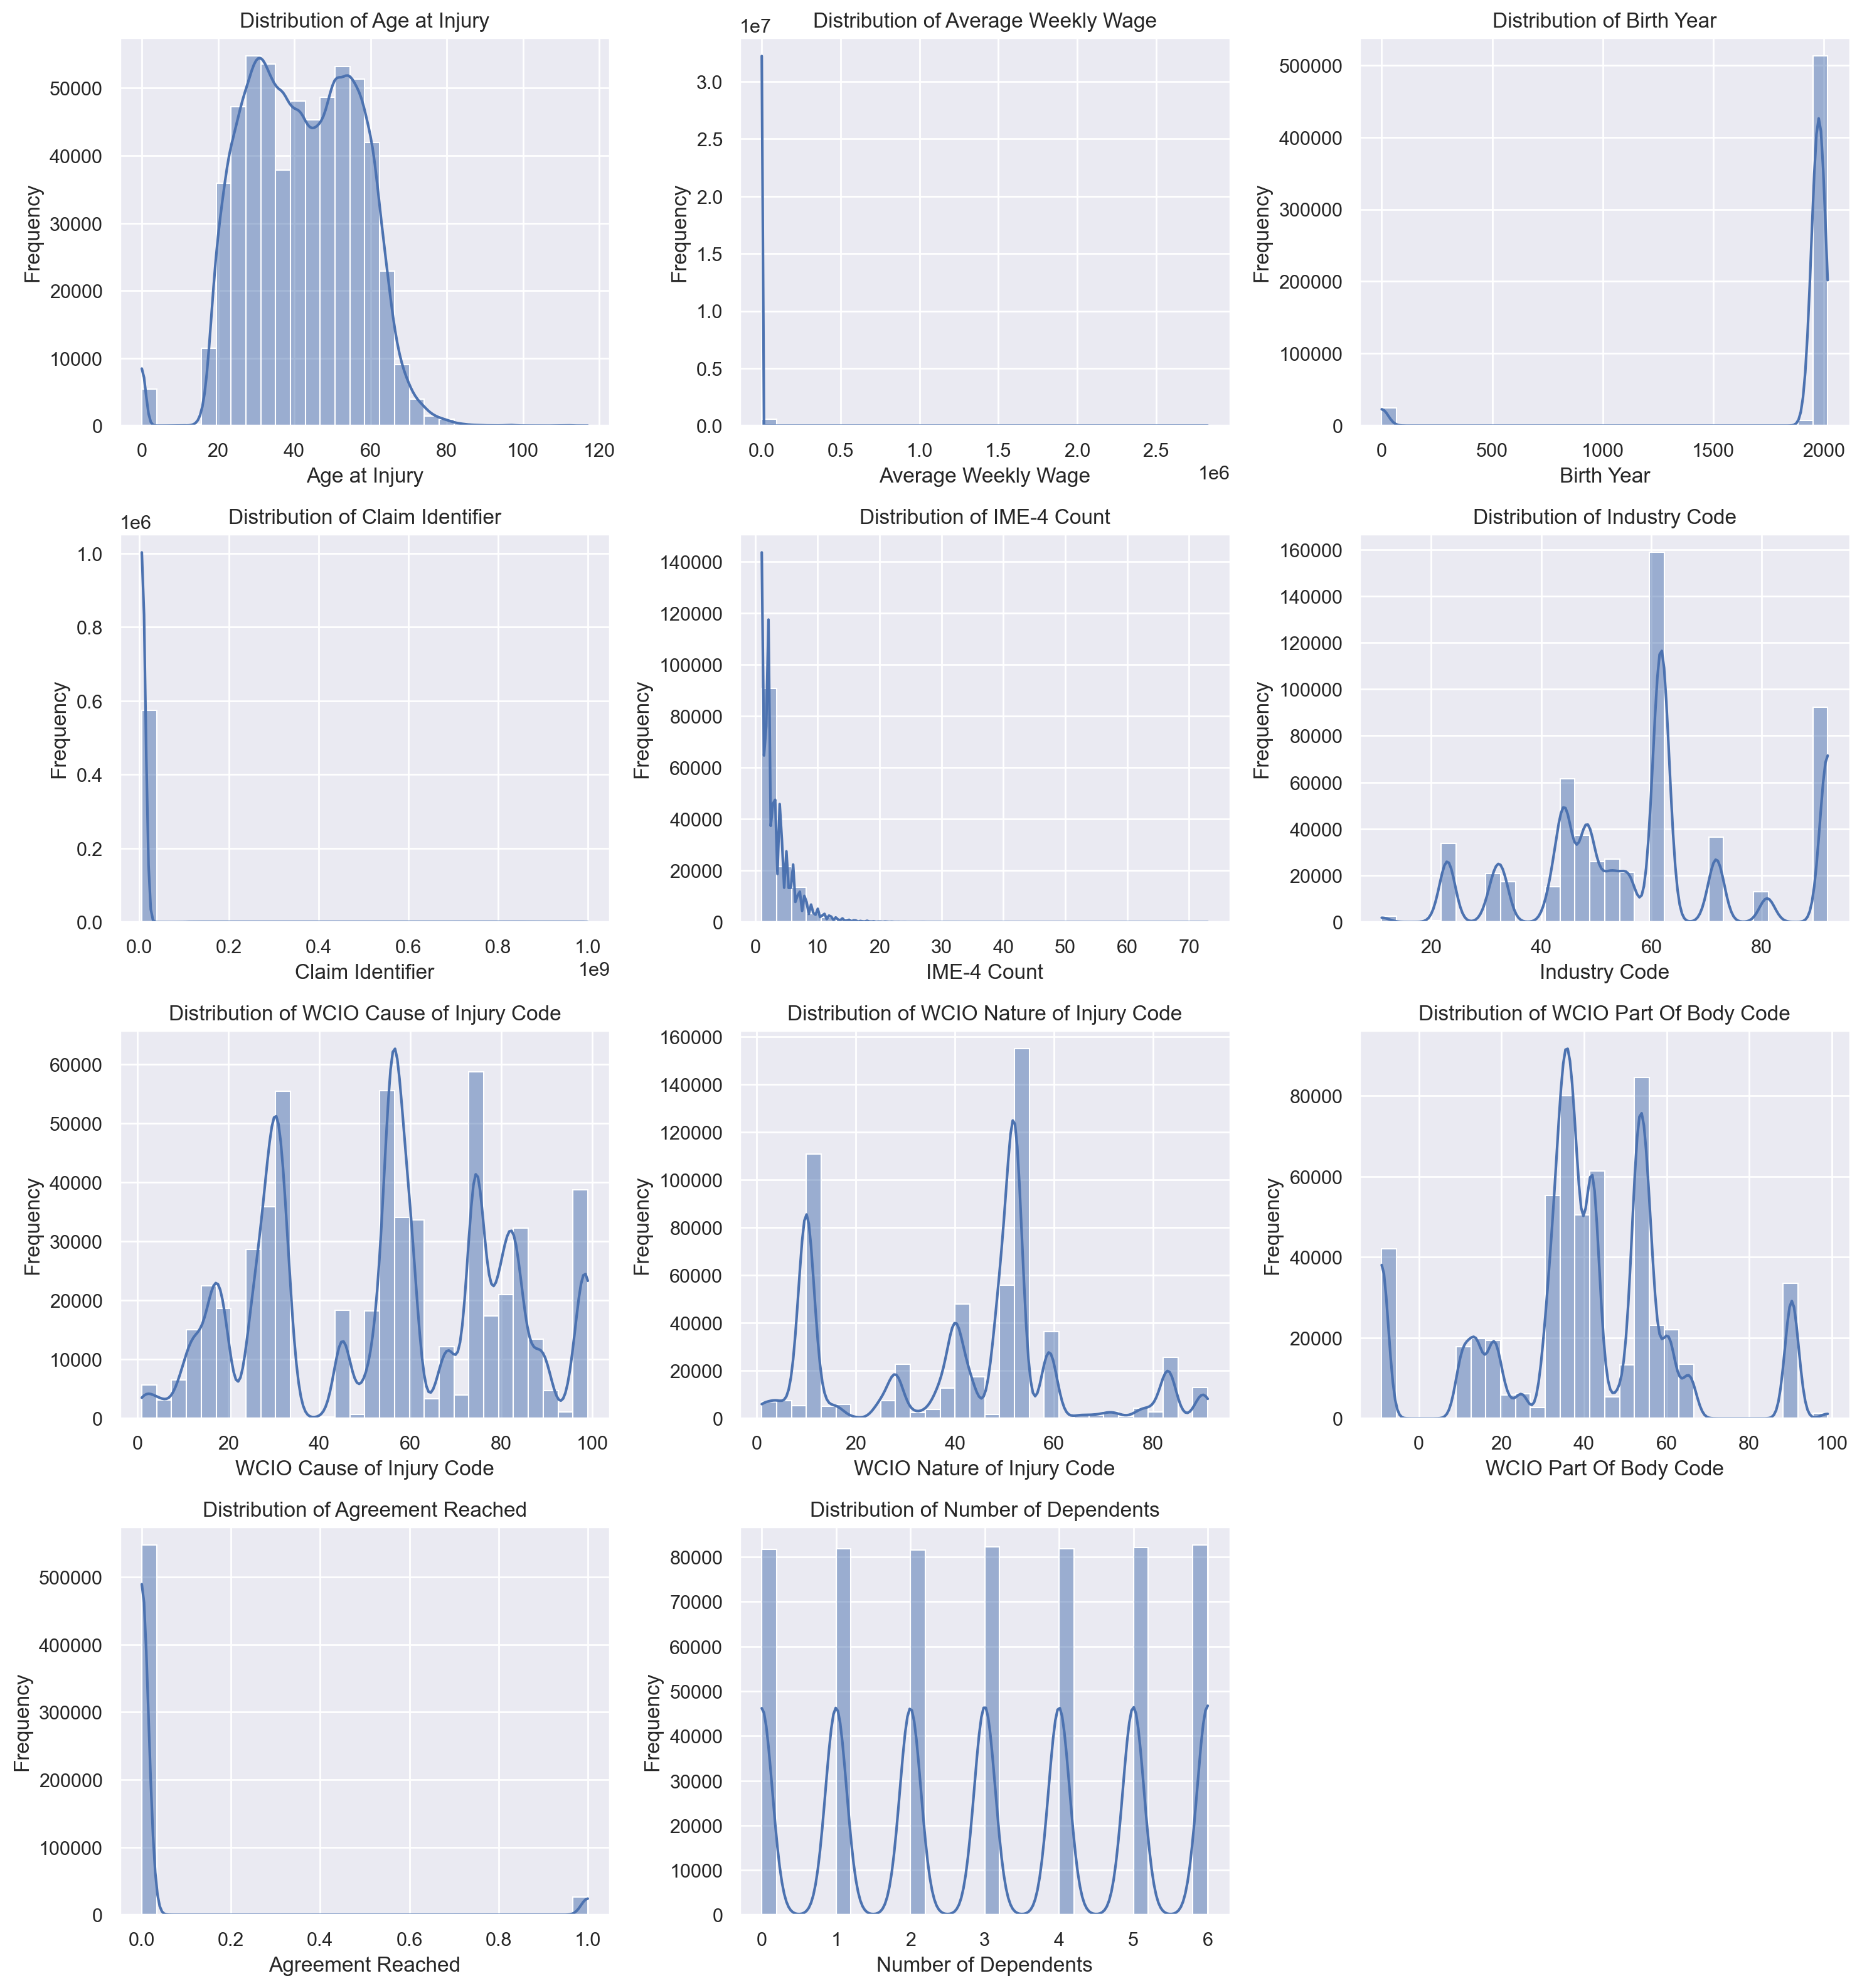

In [18]:
# Select numerical attributes with continuous values
numeric_attributes = wcb_train.loc[:, ['Age at Injury', "Average Weekly Wage", 'Birth Year', "Claim Identifier", 'IME-4 Count','Industry Code', 'WCIO Cause of Injury Code',
                    'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',"Agreement Reached", 'Number of Dependents']]

# Set the number of subplots
num_attributes = len(numeric_attributes.columns)
num_cols = 3  # Set the number of columns for the subplots
num_rows = (num_attributes // num_cols) + (num_attributes % num_cols > 0)  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten the 2D array of axes

# Loop through each numerical attribute and plot its distribution
for i, column in enumerate(numeric_attributes.columns):
    sns.histplot(numeric_attributes[column], bins=30, kde=True, ax=axes[i])  # KDE adds a density curve
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

**From these visualizations we can conclude:** <br>
- Majority of `Age at Injury` is between 18 and 80 <br>
- `Birth Year` may have some outliers (born year 0) <br>
- The count for `IME-4 Count` values decreases very rapidly the bigger is the count <br>
- `Agreement Reached` says that most agreements haven't been reached <br>
- `Number of Dependents` has same frequency for all its values <br>

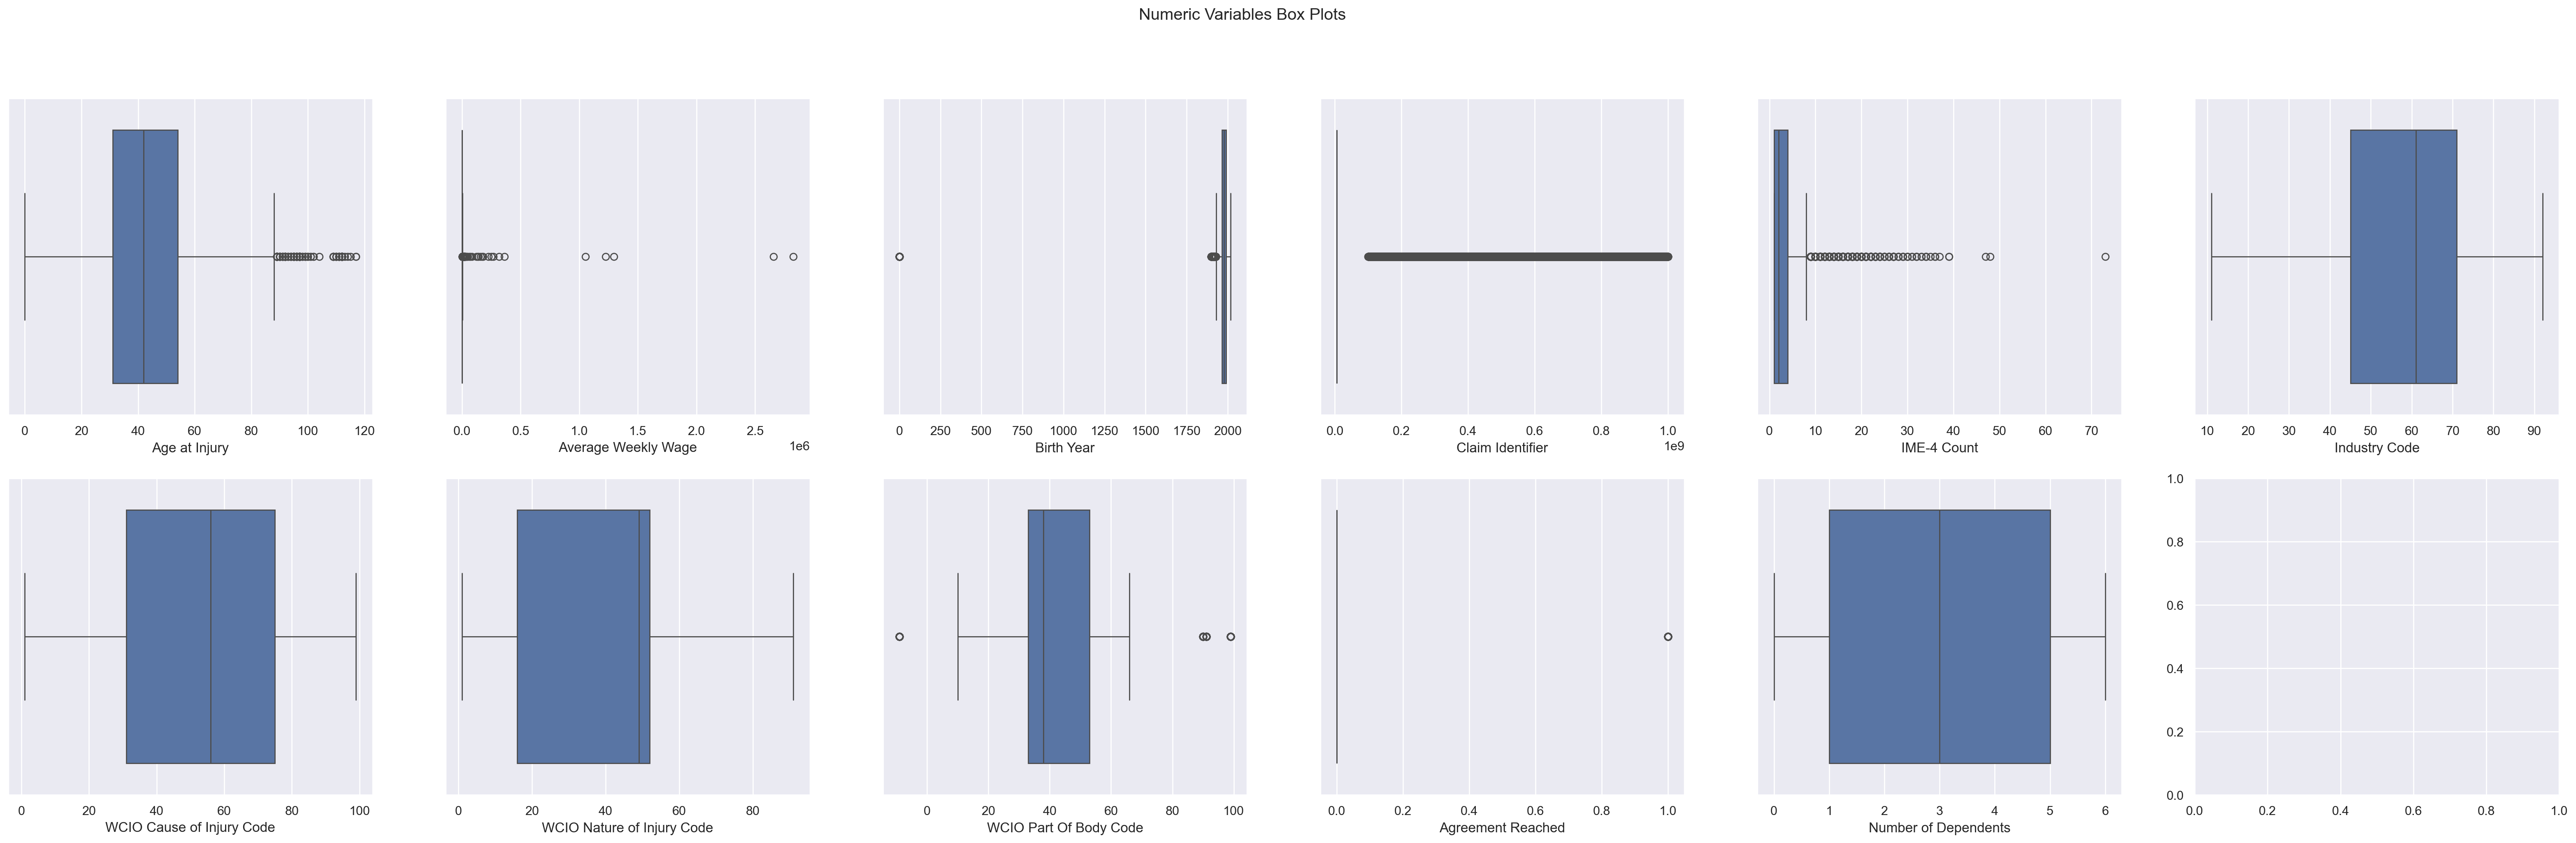

In [19]:
box_plot_features = ['Age at Injury', "Average Weekly Wage", 'Birth Year', "Claim Identifier", 'IME-4 Count','Industry Code', 'WCIO Cause of Injury Code',
                    'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',"Agreement Reached", 'Number of Dependents']

sns.set()
fig, axes = plt.subplots(2, ceil(len(box_plot_features) / 2), figsize=(40, 11))
for ax, feat in zip(axes.flatten(), box_plot_features):
    sns.boxplot(x=wcb_train[feat], ax=ax)
    
title = "Numeric Variables Box Plots"
plt.suptitle(title)
plt.show()

**From these visualizations we can conclude:** <br>
- Most of the outliers of `Age at Injury` are above 85 or close to that <br>
- `Average Weekly Wage` has outliers that are a few thousand times higher than the normal values <br>
- `IME-4 Count` ranges from 0 to around 8 <br>
- `WCIO Part Of Body Code` has a negative value <br>
- `Number of Dependents` has same frequency for all its values <br>

### Categorical Data Visualization

Since the variable `WCB Decision` doesn't have any variance we think it won't the helpful for the development of the model, therefore we think it should be dropped.

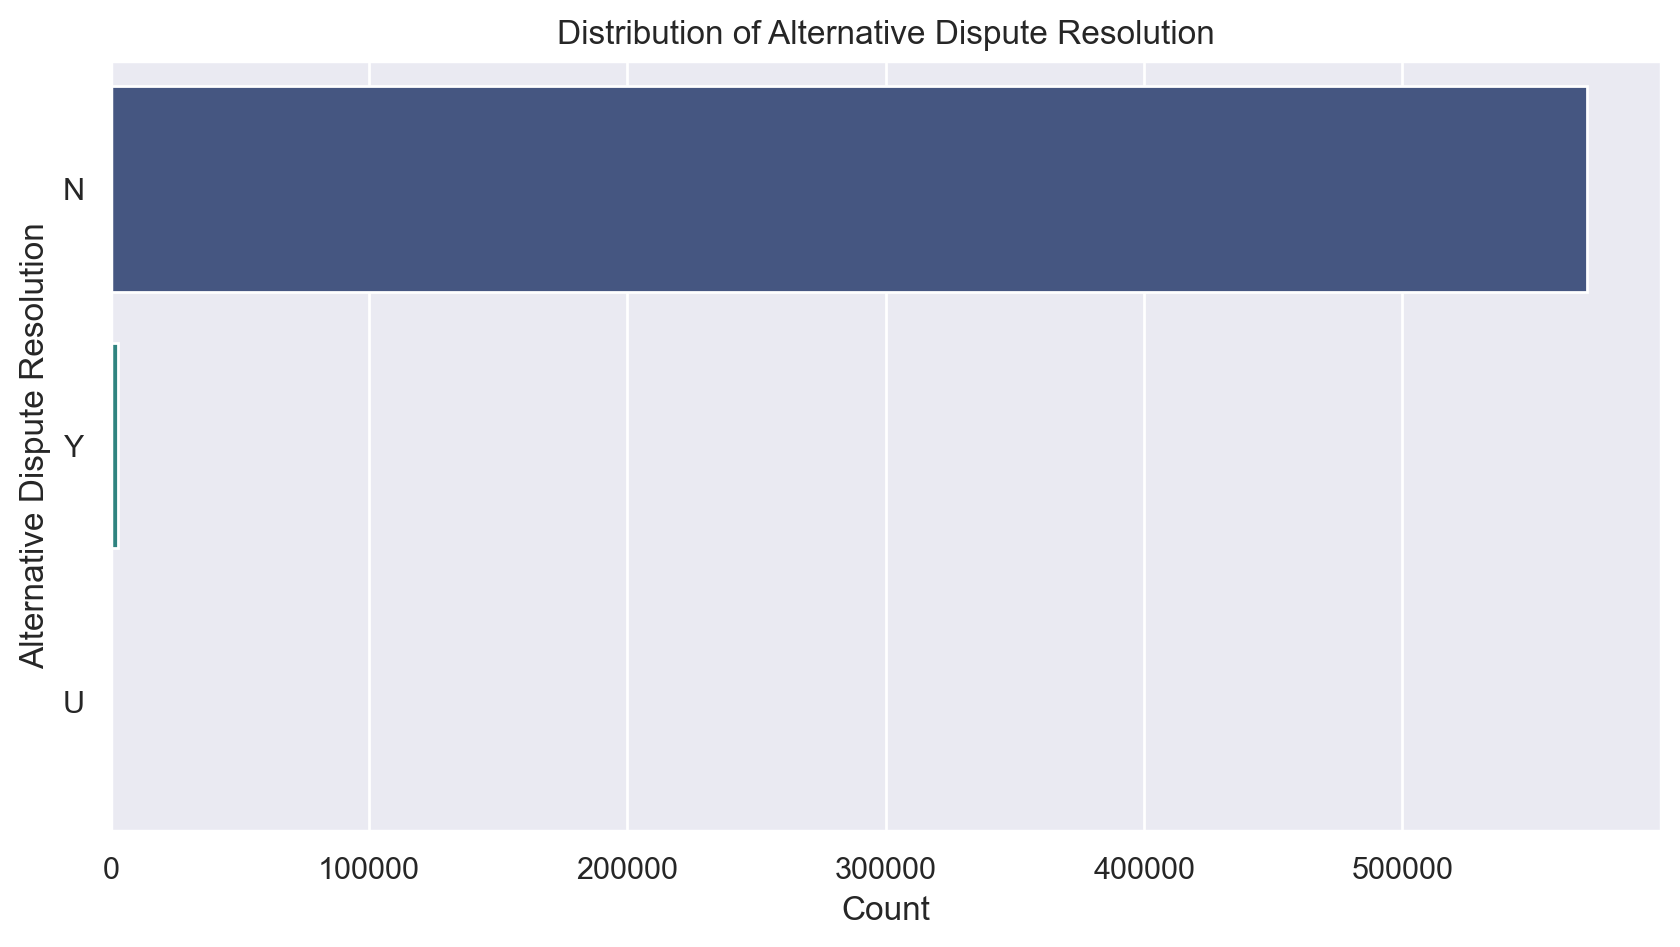

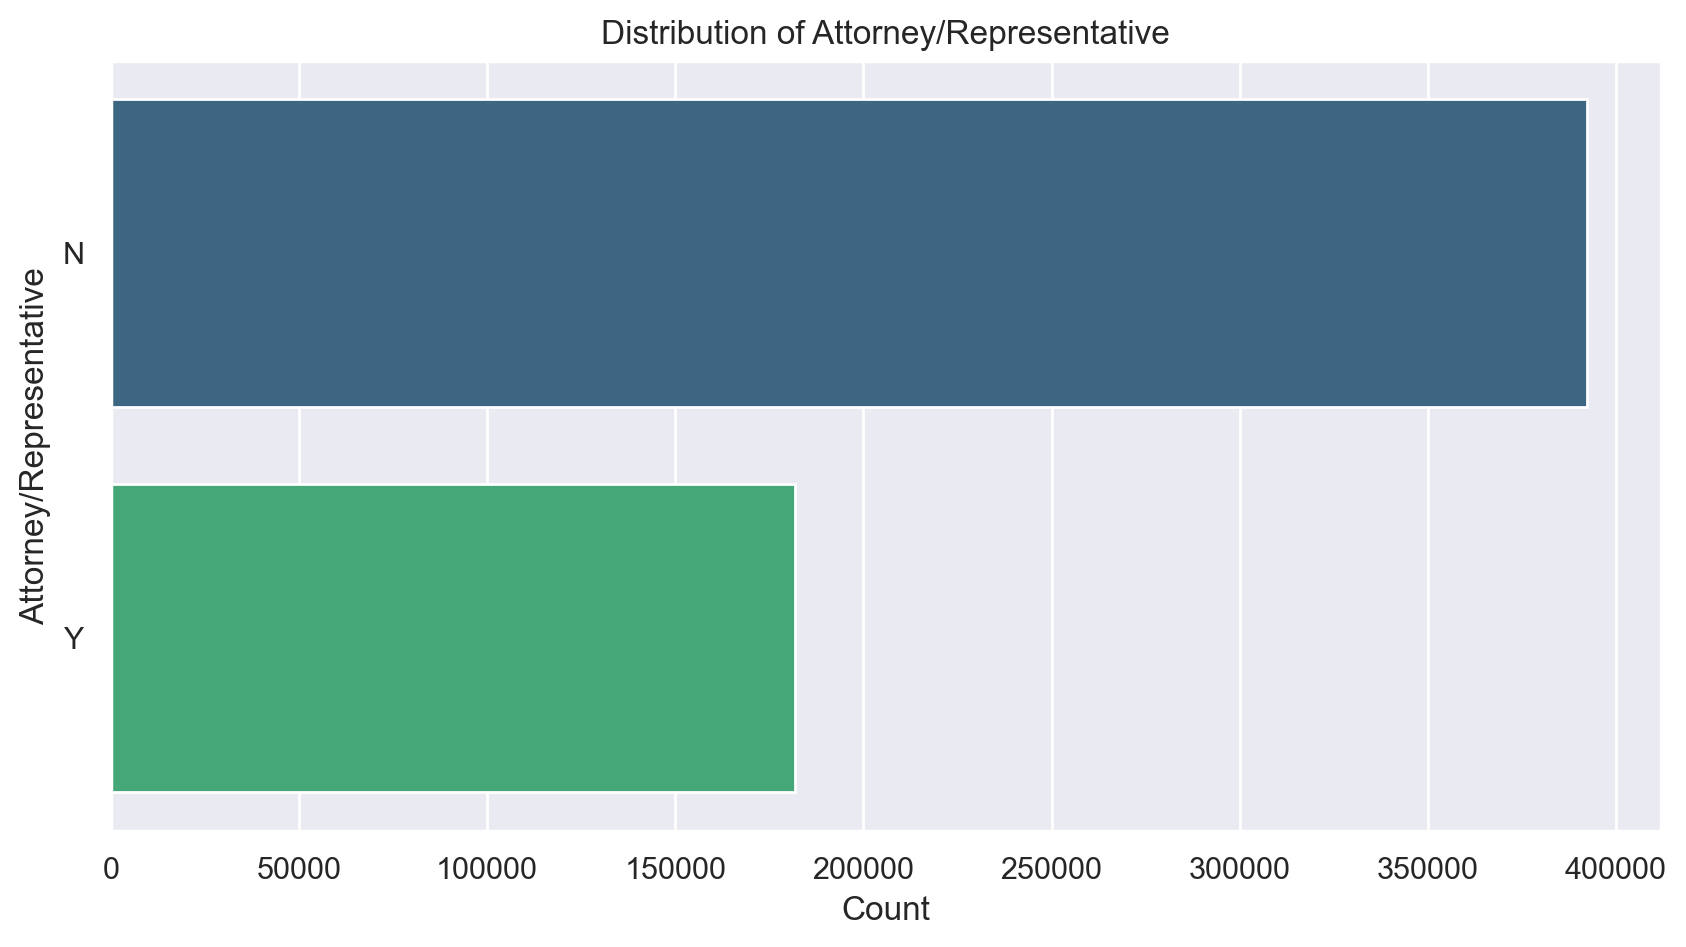

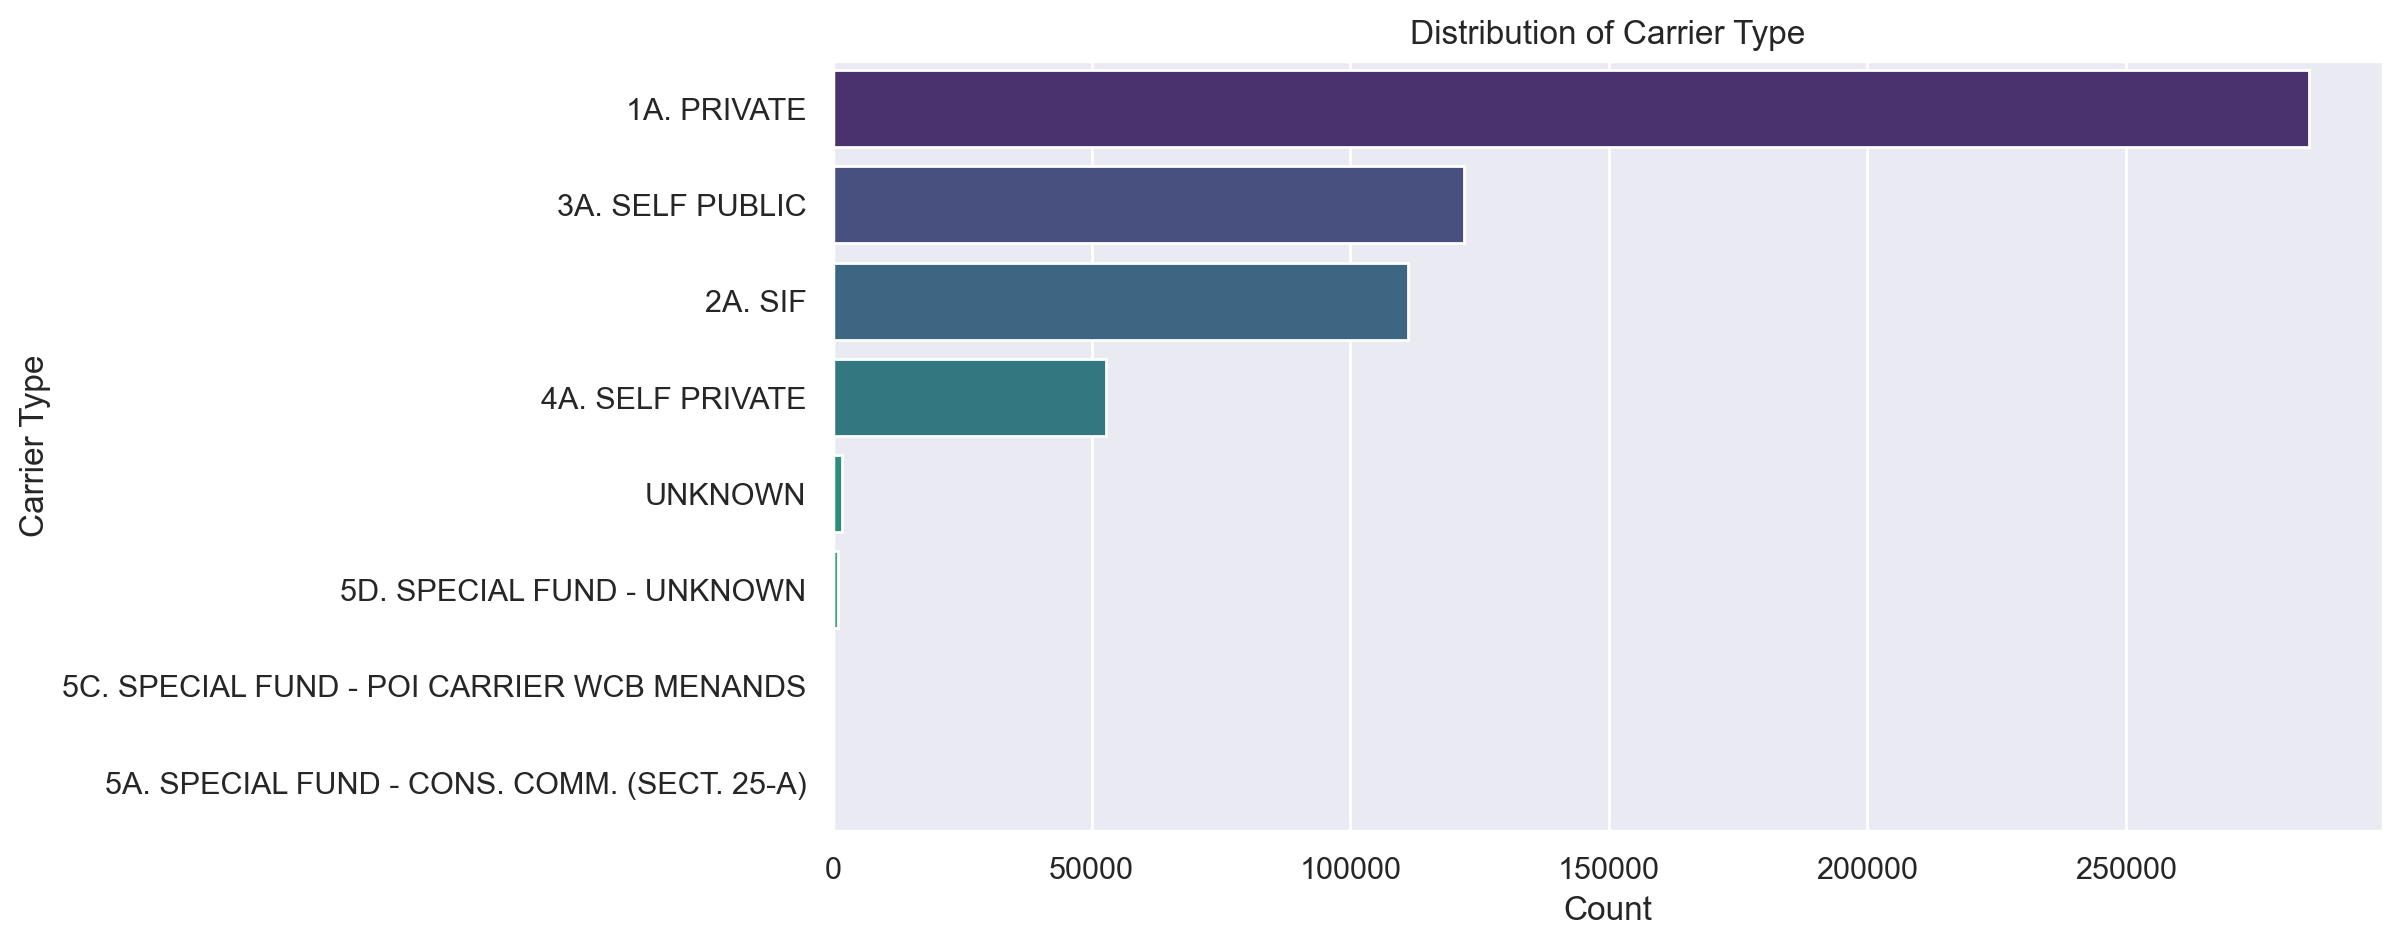

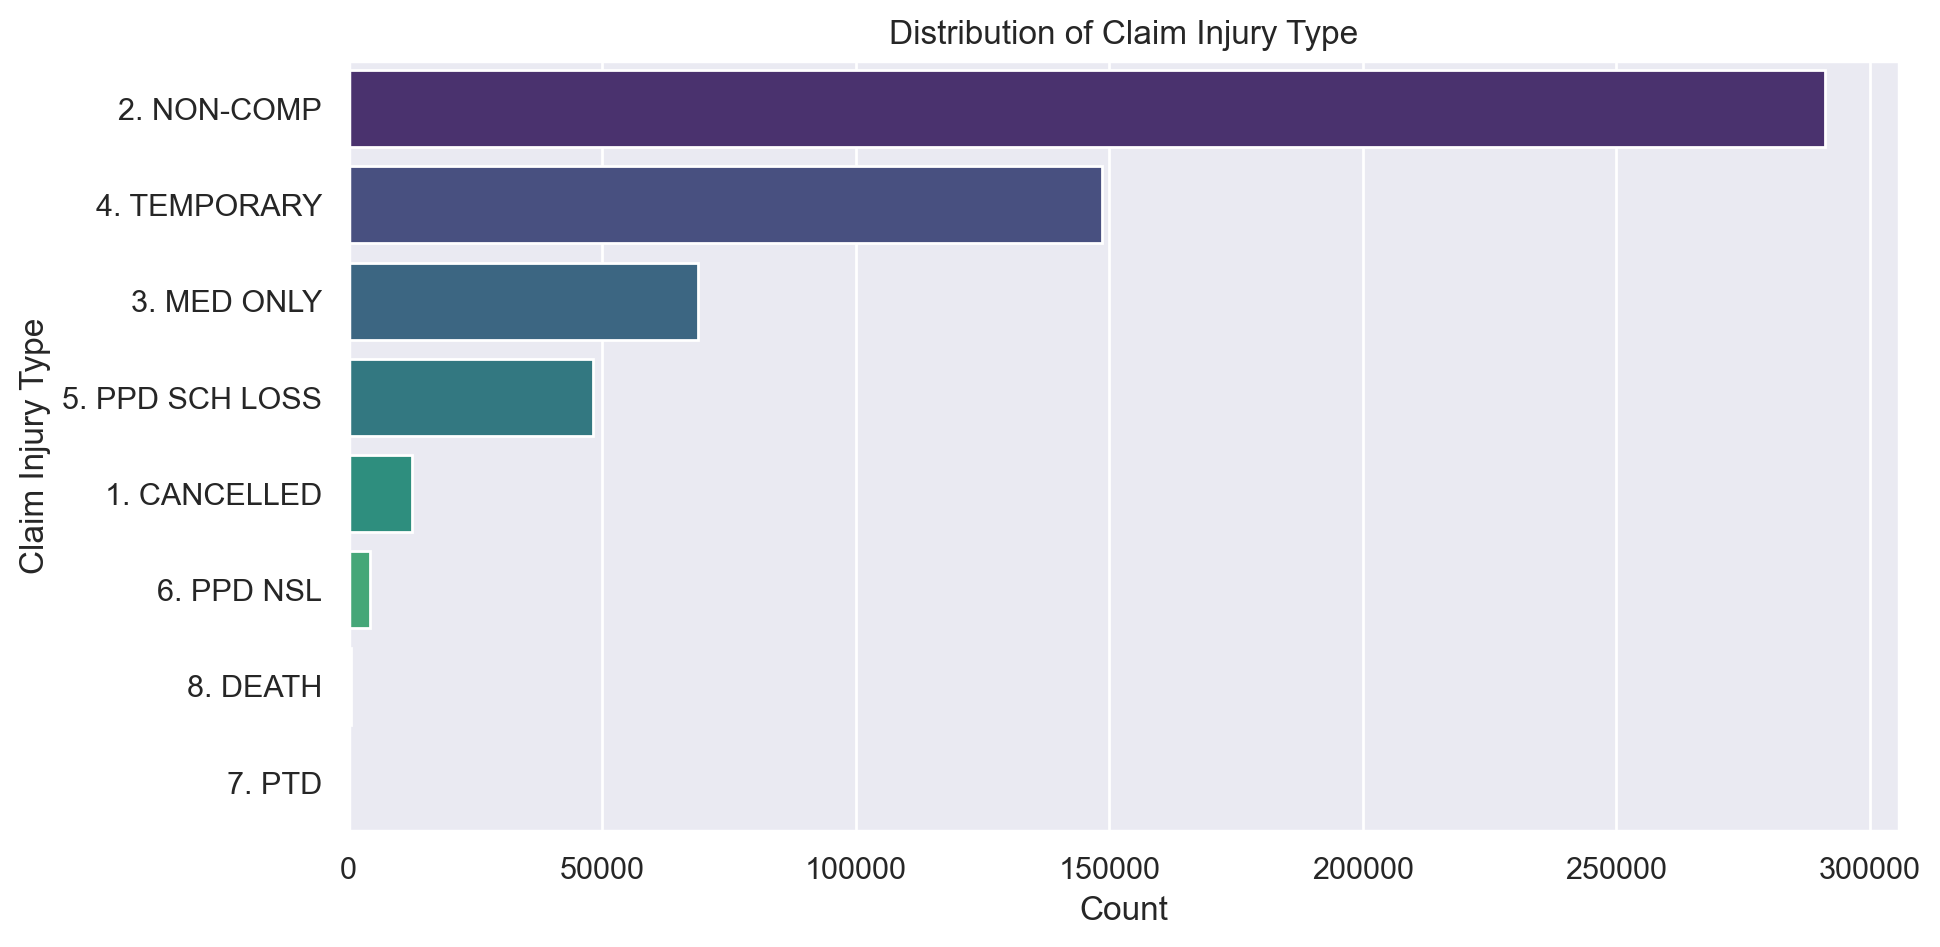

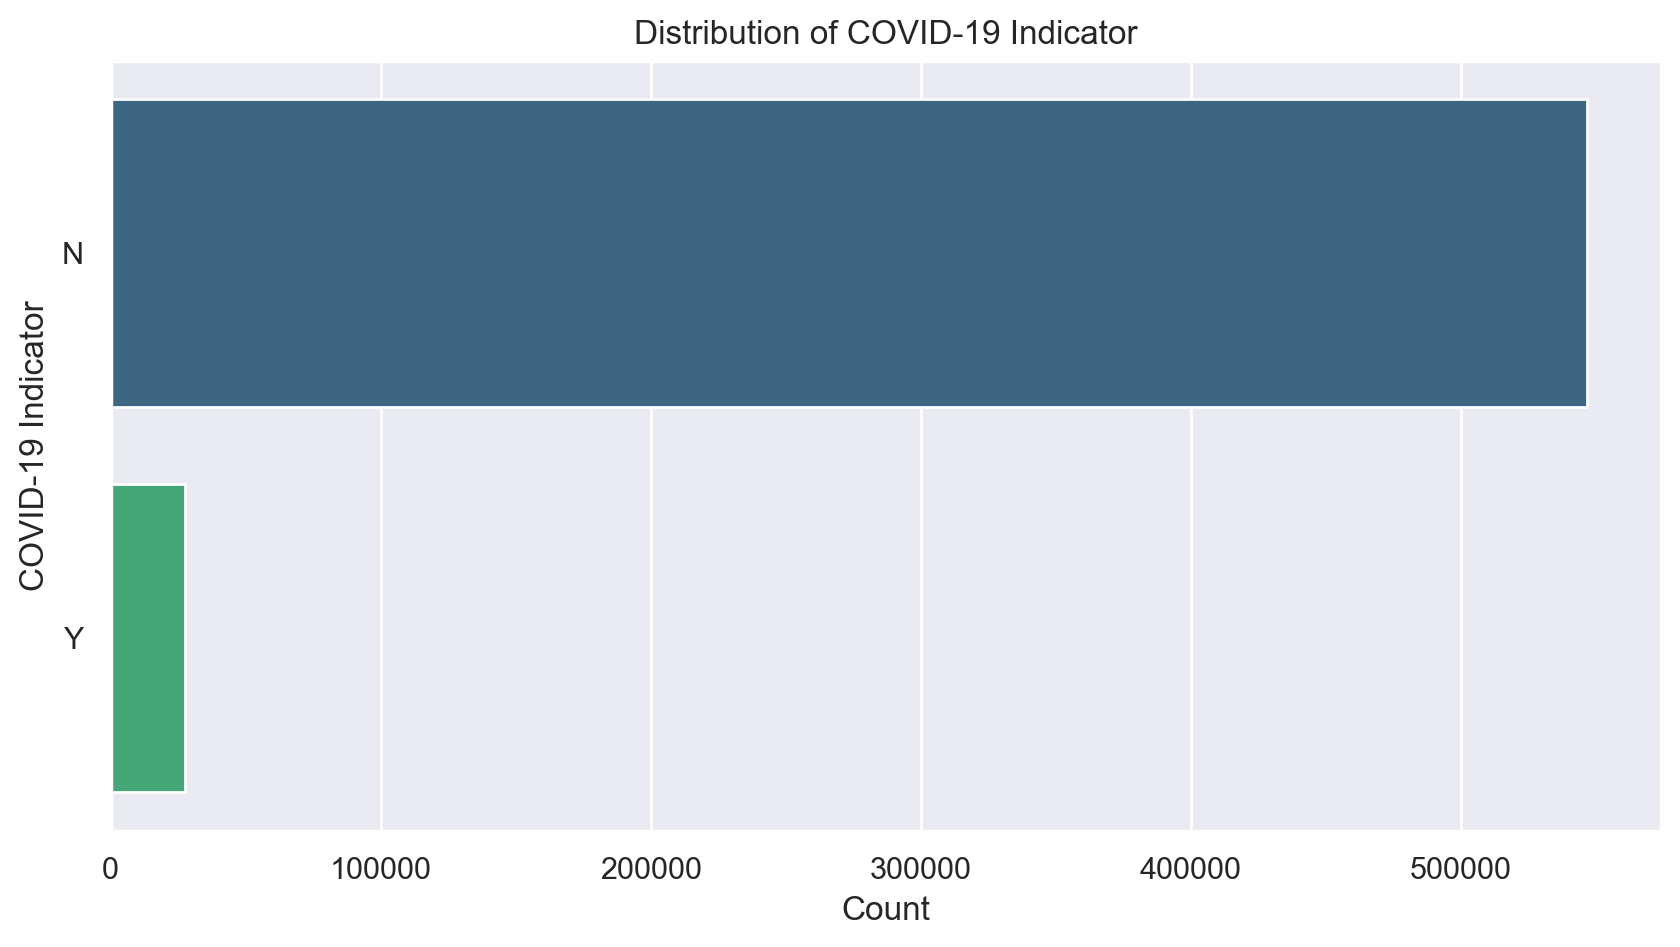

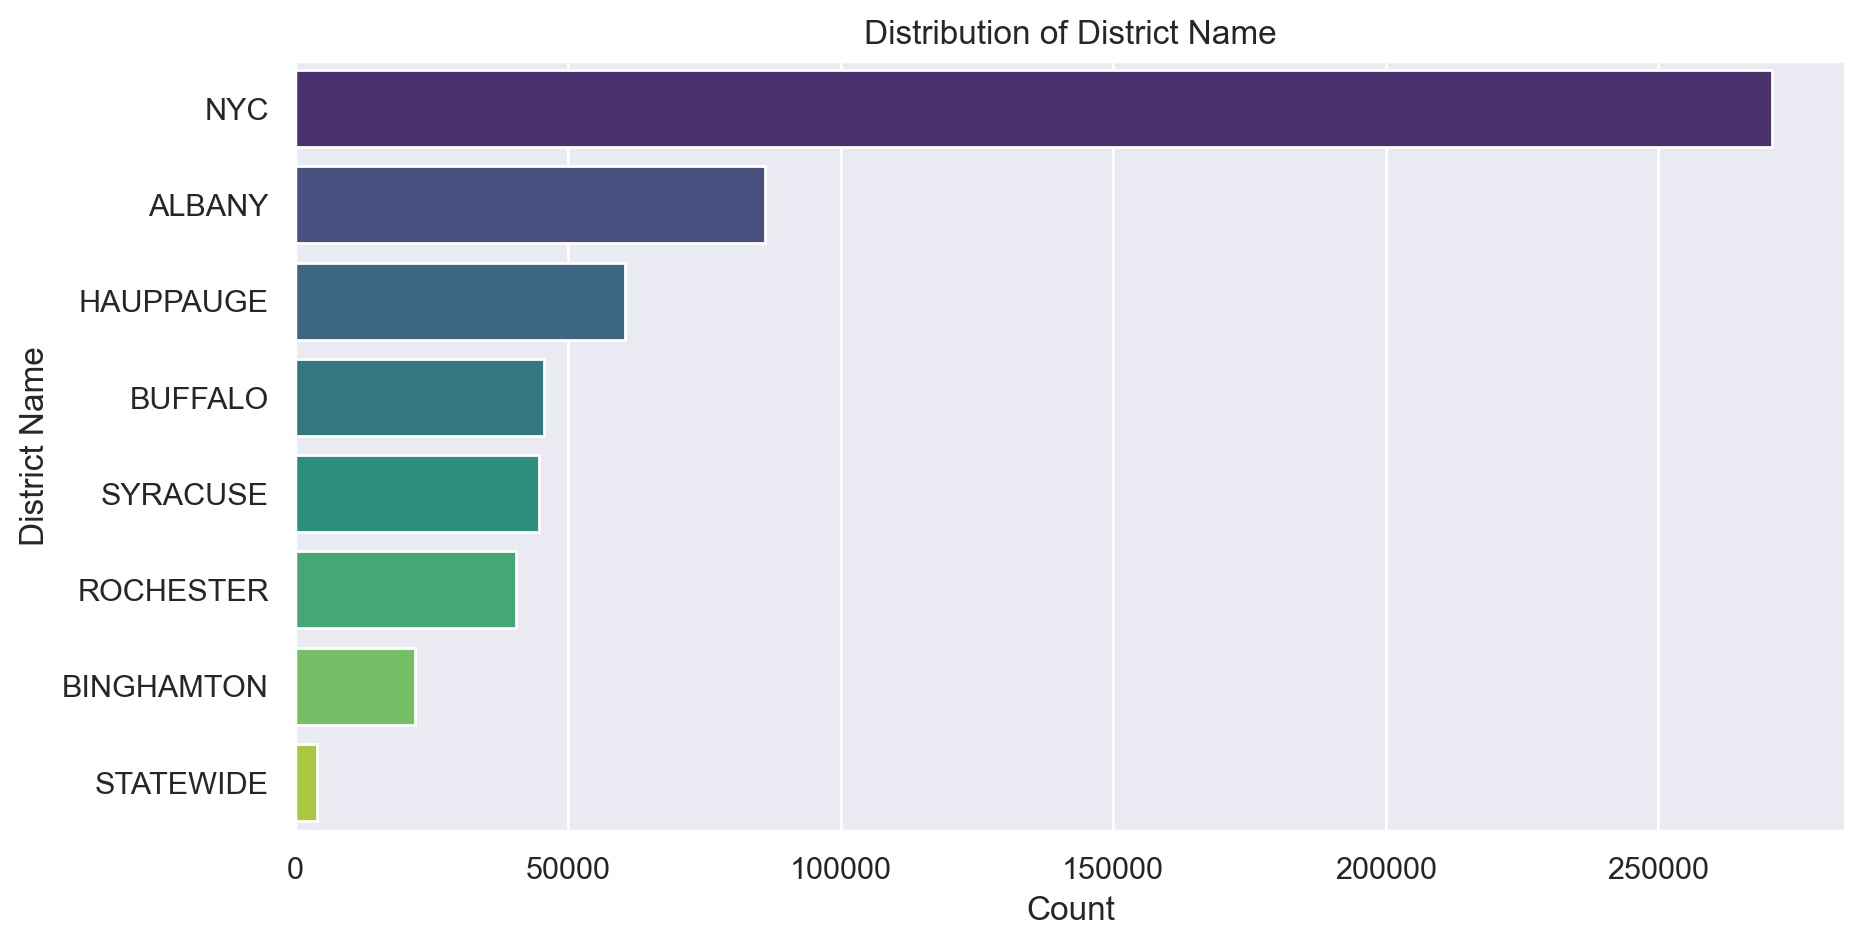

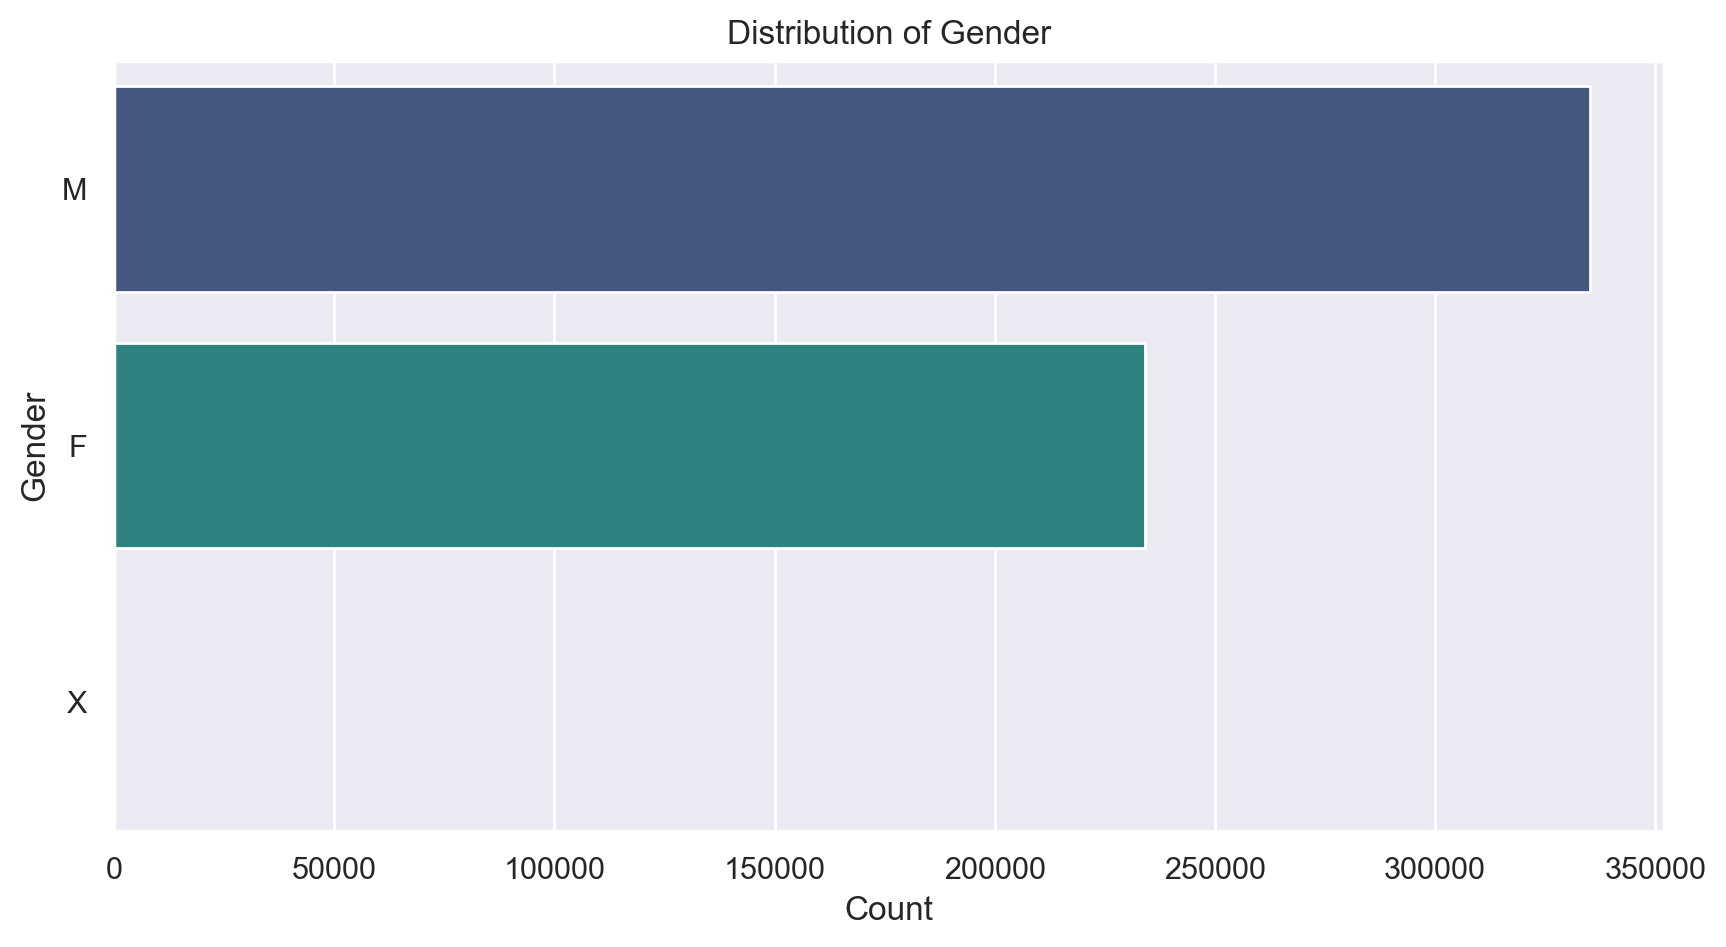

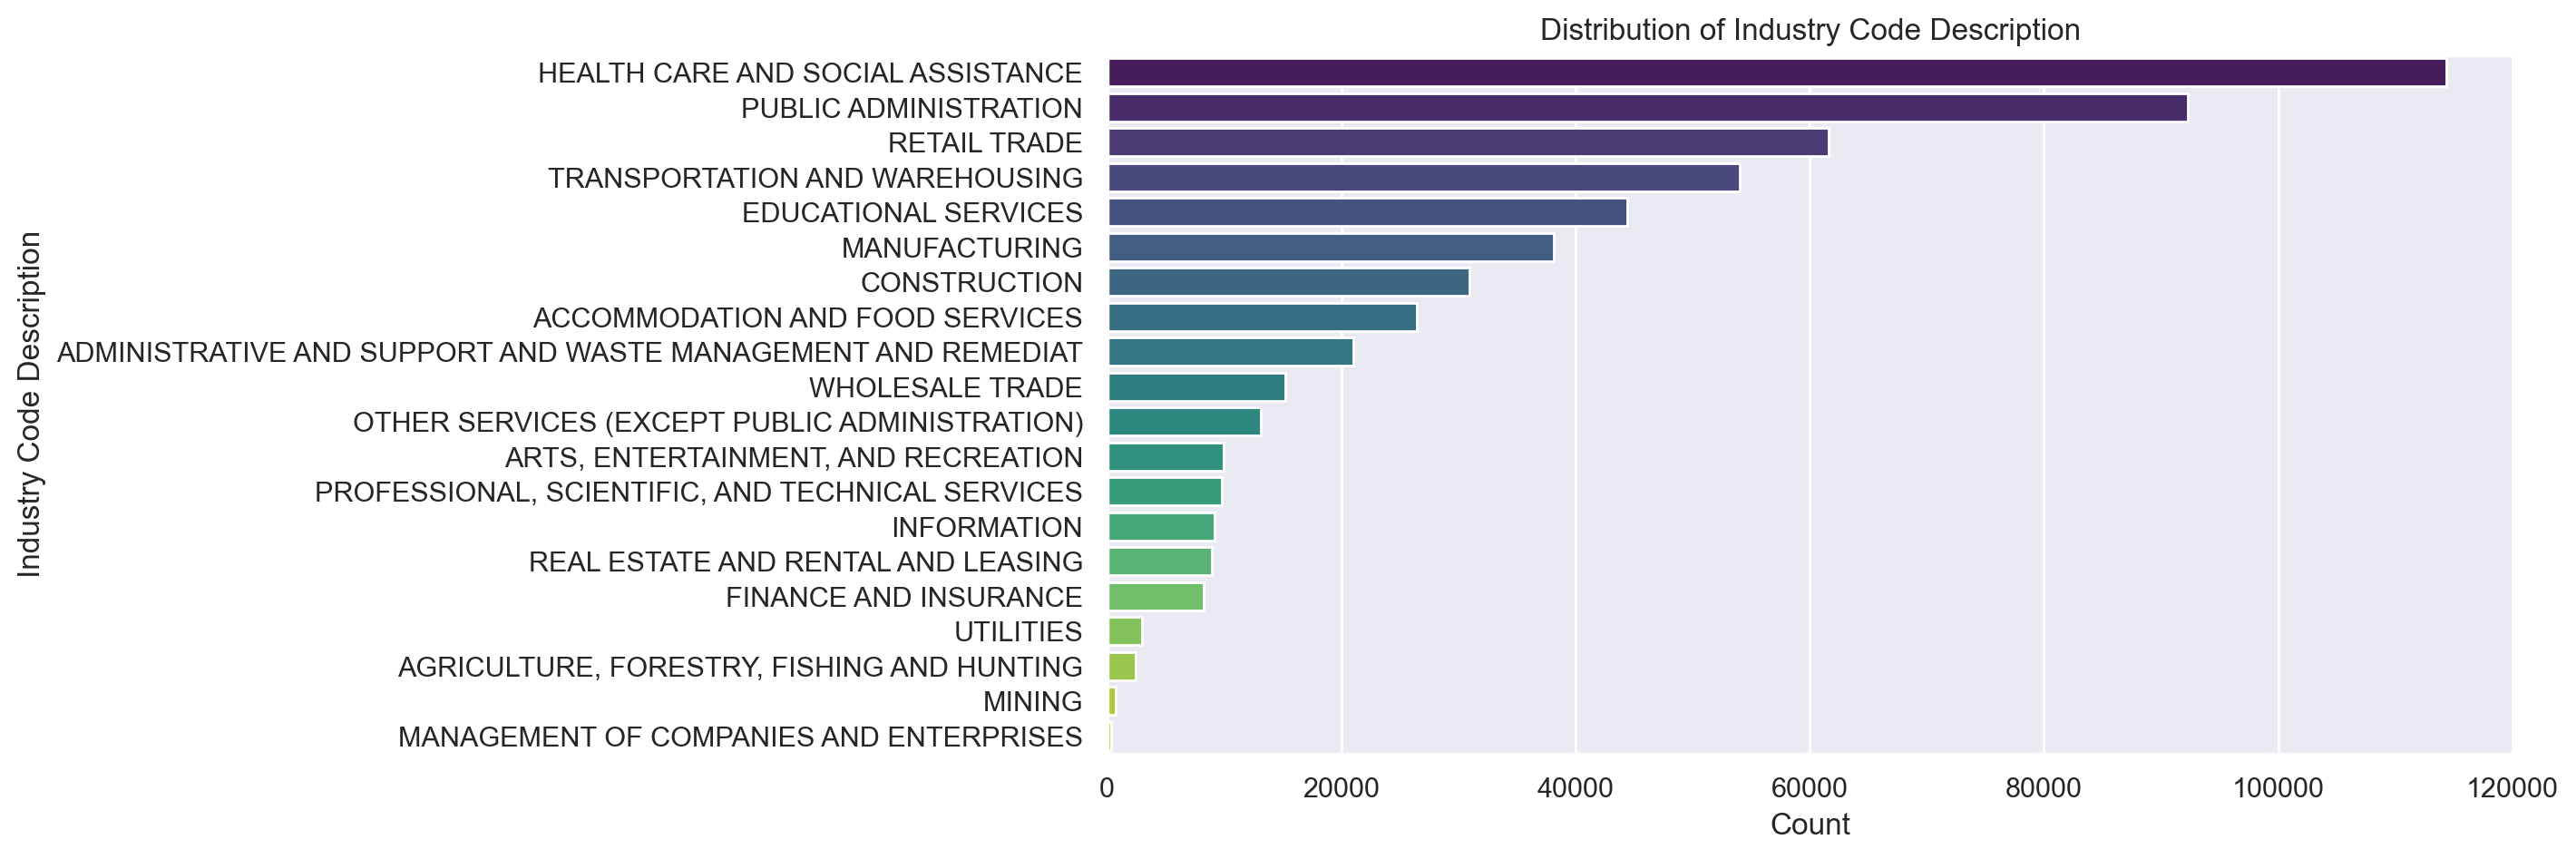

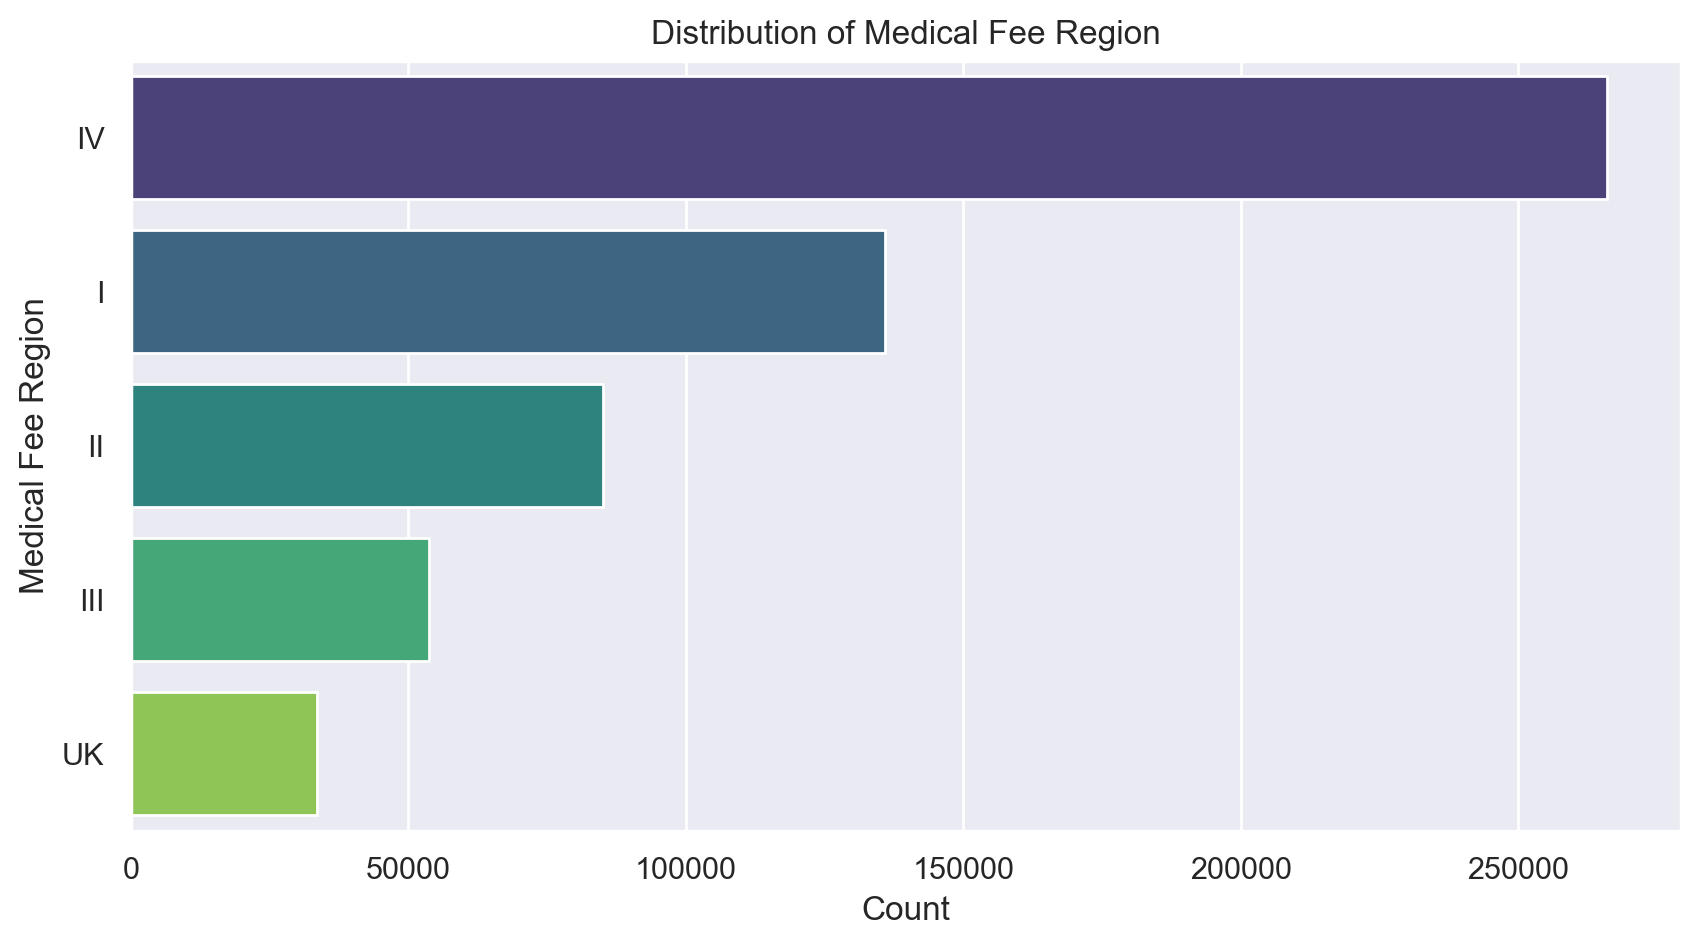

In [20]:
categorical_features = [
    'Alternative Dispute Resolution',
    'Attorney/Representative',
    'Carrier Type',
    'Claim Injury Type',
    'COVID-19 Indicator',
    'District Name',
    'Gender',
    'Industry Code Description',
    'Medical Fee Region'
]

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=wcb_train[feature], order=wcb_train[feature].value_counts().index, palette="viridis")
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()

Even though that are some graphics that don't appear to display values for a few variables, for example, in the first graphic, the variable *X* happears a few times in the dataset
<br>
<br>
**From these visualizations we can conclude:** <br>
- Most injuries don't envolve COVID-19
- The most common values for the target variable `Claim Injury Type` are *2. NON-COMP* and *4. TEMPORARY*

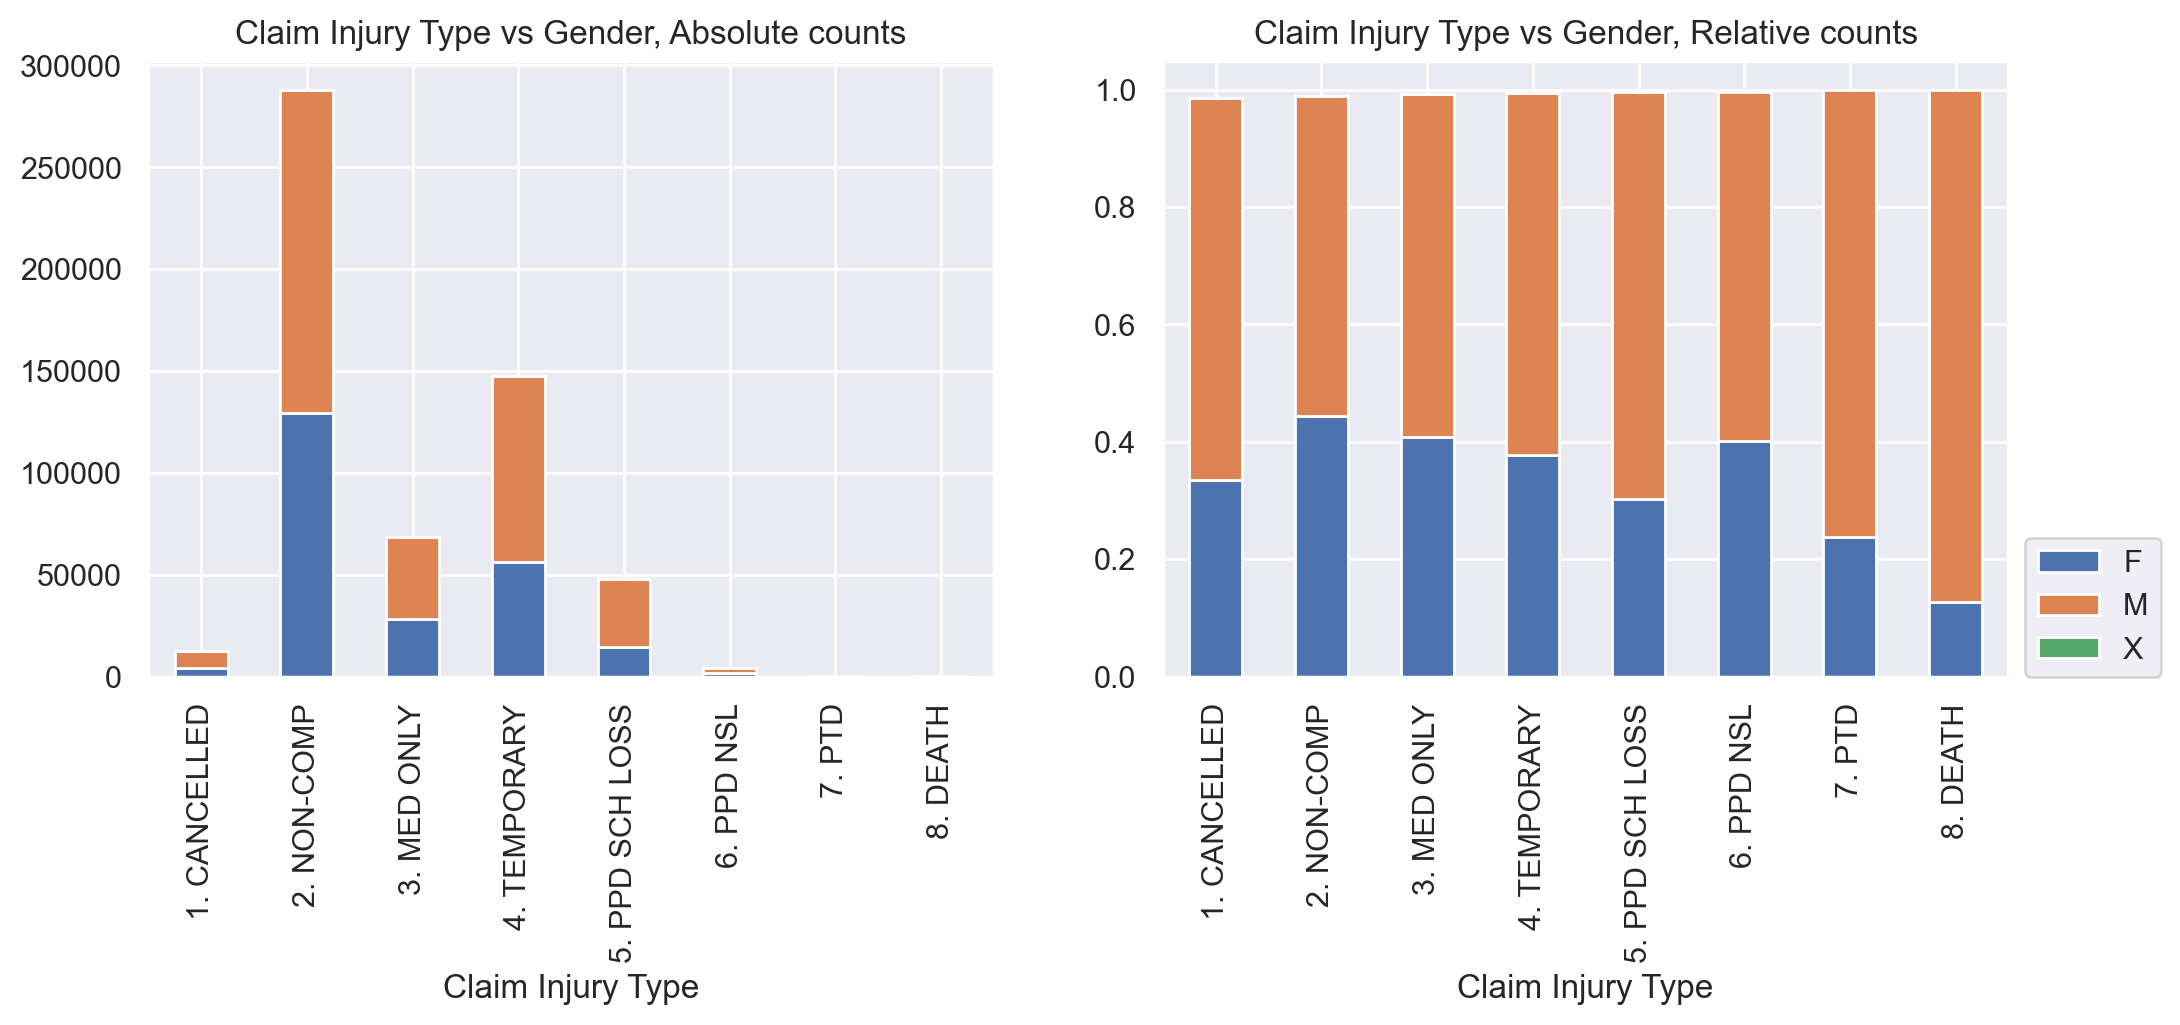

In [21]:
cat1 = 'Claim Injury Type'
cat2 = 'Gender'

fig, axes = plt.subplots(1,2, figsize=(12,4))

catpc_df = wcb_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Claim Injury Type vs Gender, Absolute counts')
axes[0].legend([], frameon=False)

catpc_df2 = wcb_train.groupby([cat1, cat2])[cat2].size() / wcb_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title('Claim Injury Type vs Gender, Relative counts')
axes[1].legend(loc=(1.02,0))

plt.show()

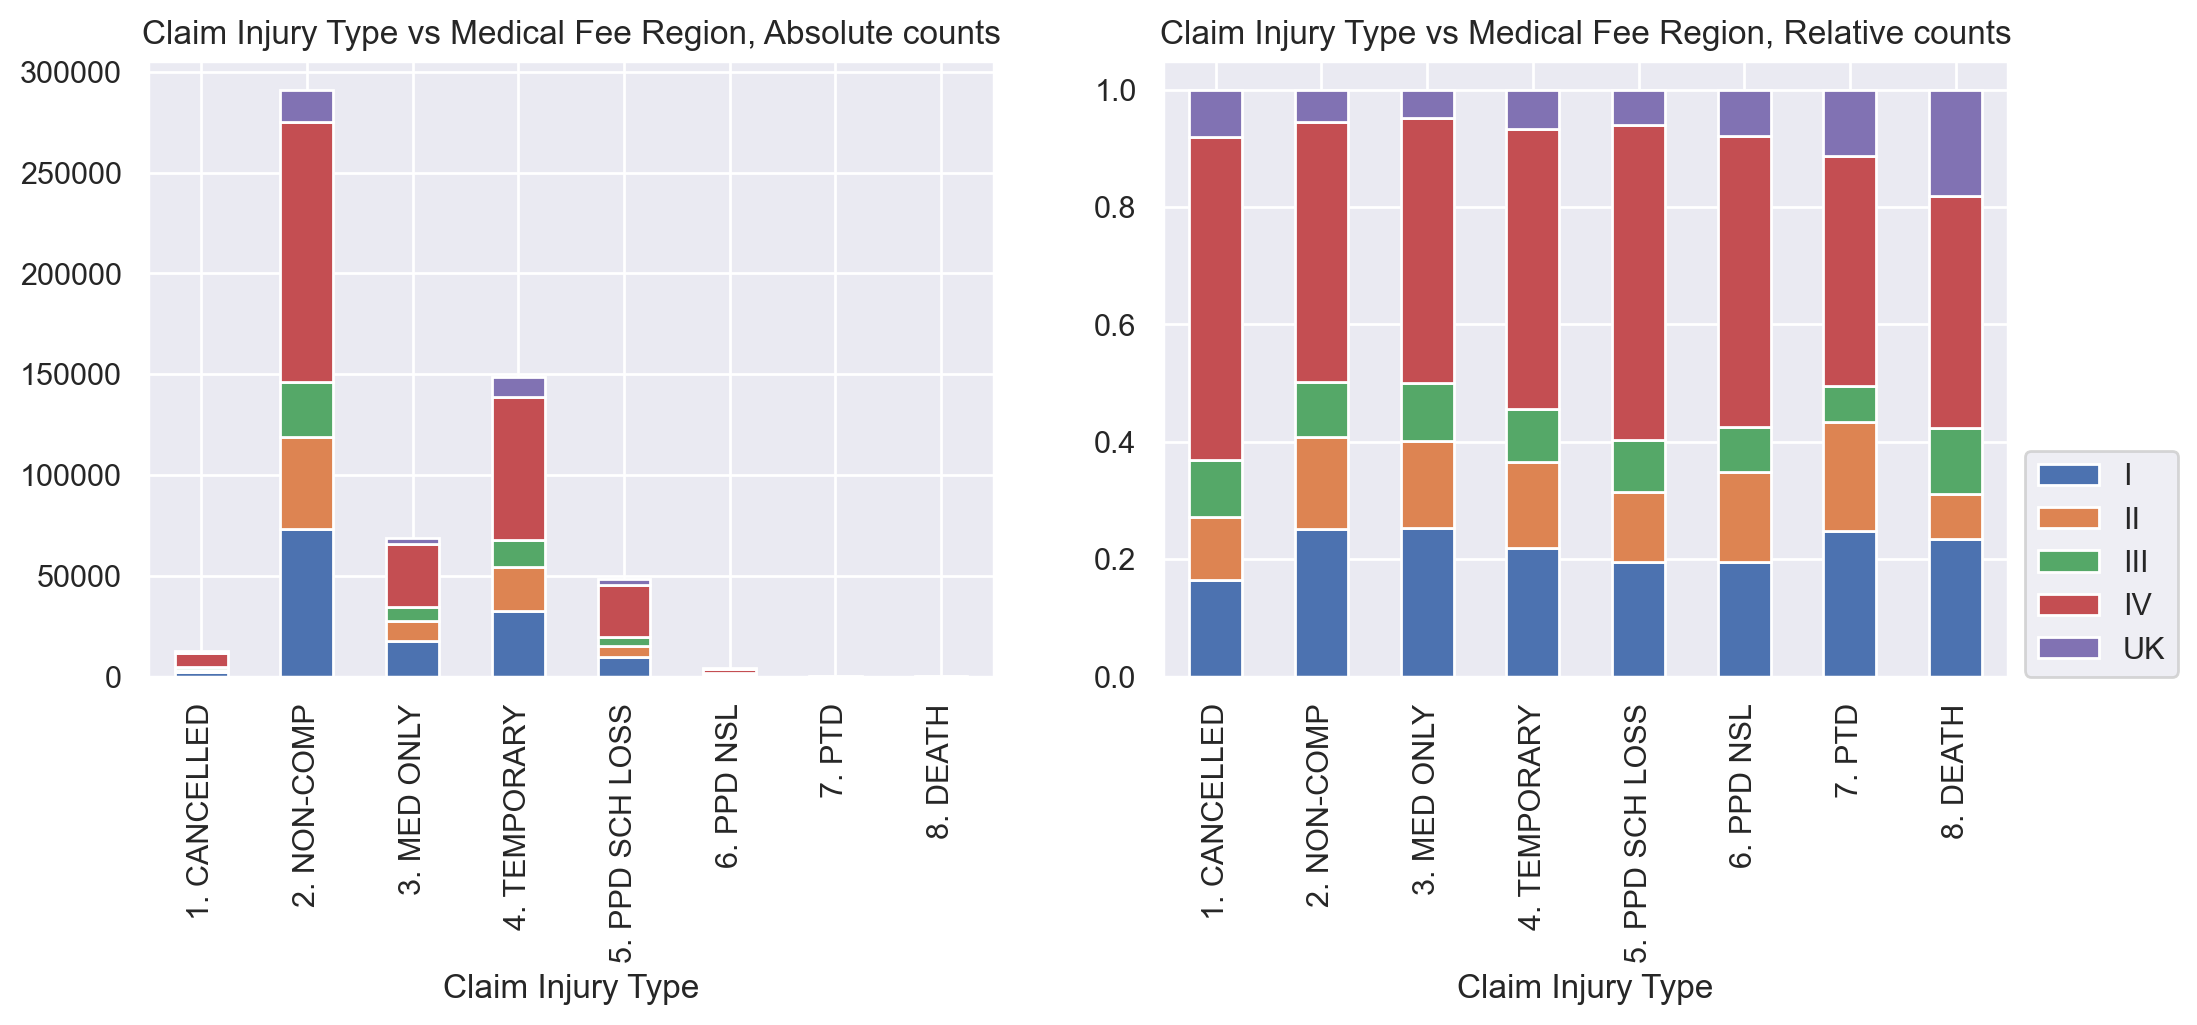

In [22]:
cat1 = 'Claim Injury Type'
cat2 = 'Medical Fee Region'

fig, axes = plt.subplots(1,2, figsize=(12,4))

catpc_df = wcb_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Claim Injury Type vs Medical Fee Region, Absolute counts')
axes[0].legend([], frameon=False)

catpc_df2 = wcb_train.groupby([cat1, cat2])[cat2].size() / wcb_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title('Claim Injury Type vs Medical Fee Region, Relative counts')
axes[1].legend(loc=(1.02,0))

plt.show()

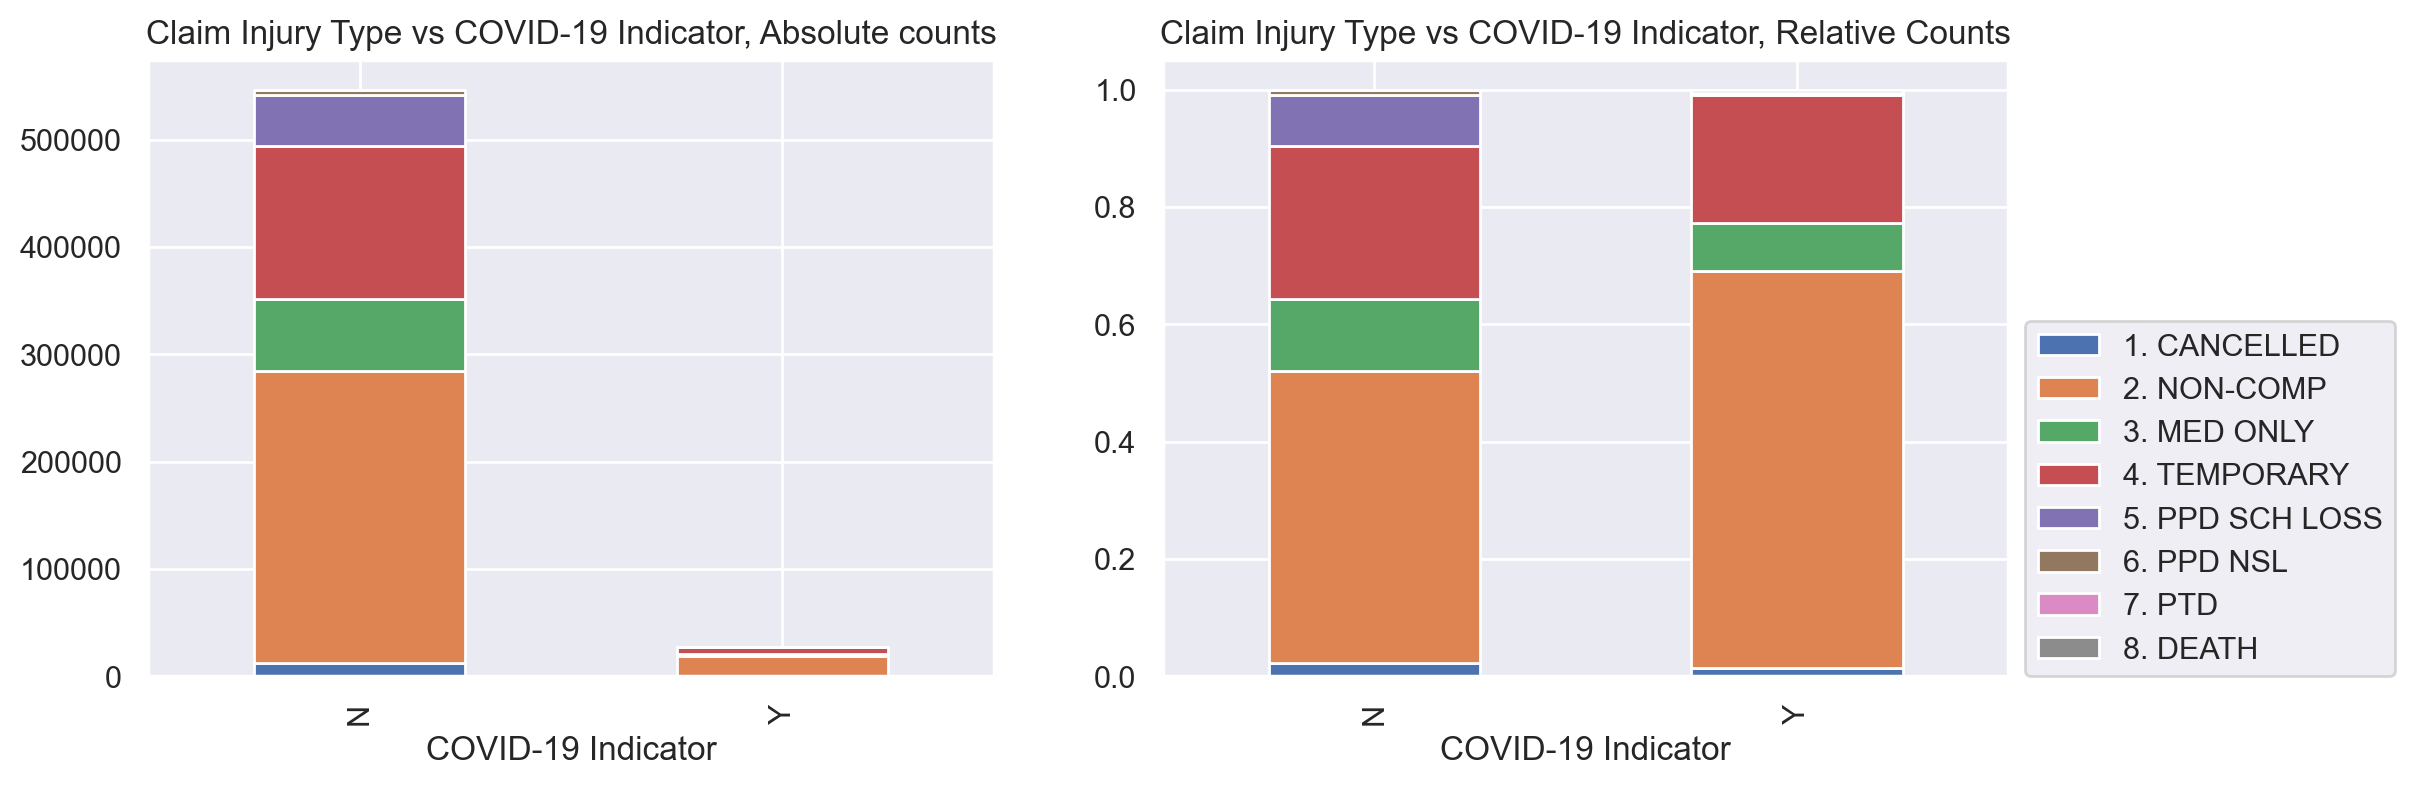

In [23]:
cat1 = 'COVID-19 Indicator'
cat2 = 'Claim Injury Type'

fig, axes = plt.subplots(1,2, figsize=(12,4))

catpc_df = wcb_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Claim Injury Type vs COVID-19 Indicator, Absolute counts')
axes[0].legend([], frameon=False)

catpc_df2 = wcb_train.groupby([cat1, cat2])[cat2].size() / wcb_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title('Claim Injury Type vs COVID-19 Indicator, Relative Counts')
axes[1].legend(loc=(1.02,0))

plt.show()

## 1.6 Pair-wise Relationships <a name="16-pair-wise-relationships"></a>

In [ ]:
cat1 = 'Age at Injury'
cat2 = 'Attorney/Representative'

fig, axes = plt.subplots(1,2, figsize=(50,4))

catpc_df = wcb_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Age at Injur vs Attorney/Representative, Absolute counts')
axes[0].legend([], frameon=False)

catpc_df2 = wcb_train.groupby([cat1, cat2])[cat2].size() / wcb_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title('Age at Injur vs Attorney/Representative, Relative counts')
axes[1].legend(loc=(1.02,0))

plt.show()

In [ ]:
cat1 = 'Age at Injury'
cat2 = 'Gender'

fig, axes = plt.subplots(1,2, figsize=(50,4))

catpc_df = wcb_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Age at Injury vs Gender, Absolute counts')
axes[0].legend([], frameon=False)

catpc_df2 = wcb_train.groupby([cat1, cat2])[cat2].size() / wcb_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title('Age at Injury vs Gender, Relative counts')
axes[1].legend(loc=(1.02,0))

plt.show()

In [ ]:
cat1 = 'WCIO Part Of Body Description'
cat2 = 'Gender'

fig, axes = plt.subplots(1,2, figsize=(25,4))

catpc_df = wcb_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('WCIO Part Of Body Description vs Gender, Absolute counts')
axes[0].legend([], frameon=False)

catpc_df2 = wcb_train.groupby([cat1, cat2])[cat2].size() / wcb_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title('WCIO Part Of Body Description vs Gender, Relative counts')
axes[1].legend(loc=(1.02,0))

plt.show()

# 2. Clean and Pre-process the Data <a name="2-clean-and-pre-process-the-data"></a>

In [24]:
wcb_train = wcb_train.dropna(subset=['Claim Injury Type'])

In [25]:
X = wcb_train.drop("Claim Injury Type", axis = 1)
y = wcb_train["Claim Injury Type"]

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, 
                                                  random_state = 0, 
                                                  stratify = y,
                                                  shuffle = True)

In [27]:
X_train.shape

(459220, 32)

In [28]:
X_val.shape

(114806, 32)

## 2.1 Missing Values <a name="21-missing-values"></a>

`Step 1` **Disposable rows and columns**

Check for % non-null values for each feature:

In [29]:
non_null_percentage = X_train.notna().mean() * 100
null_counts = X_train.isna().sum()

non_null_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
31,Number of Dependents,100.000000,0
14,District Name,100.000000,0
2,Alternative Dispute Resolution,100.000000,0
3,Assembly Date,100.000000,0
4,Attorney/Representative,100.000000,0
30,WCB Decision,100.000000,0
29,Agreement Reached,100.000000,0
20,Medical Fee Region,100.000000,0
1,Age at Injury,100.000000,0
9,Carrier Name,100.000000,0


**Drop column with all null values:**

In [30]:
X_train.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

In [31]:
X_val.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

In [32]:
wcb_test.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

Check how many rows with missing values there are throughout all dataset columns: <br>
Excluding `Assembly Date` and `Claim Identifier`, which have values for every row but aren't relevant enough to keep if all others are NaN

In [33]:
nan_columns = X_train.columns.drop(['Assembly Date', 'Claim Identifier'])

((X_train[nan_columns].isnull()) | (X_train[nan_columns] == 0)).all(axis=1).sum()

0

Since there are no null rows, there is no need to drop anything at this point in `X_train` nor `X_val`

In [34]:
non_null_percentage = X_train.notna().mean() * 100
null_counts = X_train.isna().sum()

non_null_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
30,Number of Dependents,100.000000,0
14,District Name,100.000000,0
2,Alternative Dispute Resolution,100.000000,0
3,Assembly Date,100.000000,0
4,Attorney/Representative,100.000000,0
29,WCB Decision,100.000000,0
28,Agreement Reached,100.000000,0
20,Medical Fee Region,100.000000,0
1,Age at Injury,100.000000,0
9,Carrier Name,100.000000,0


In summary: <br>
We **treated missing values for a total of 15 features** with this operation.

**Columns to drop** = 1, `OIICS Nature of Injury Description` <br>

**Turn 'C-3 Date' into a binary outcome feature, where 0  "no form received" and 1 = "at least 1 form received"**

In [35]:
X_train['C-3 Binary'] = X_train['C-3 Date'].apply(lambda x: 0 if pd.isna(x) else 1)

In [36]:
X_val['C-3 Binary'] = X_val['C-3 Date'].apply(lambda x: 0 if pd.isna(x) else 1)

In [37]:
wcb_test['C-3 Binary'] = wcb_test['C-3 Date'].apply(lambda x: 0 if pd.isna(x) else 1)

**Turn 'First Hearing Date' into a binary outcome feature, where 0 = "there was no hearing" and 1 = "there was a hearing"**

In [38]:
X_train['First Hearing Binary'] = X_train['First Hearing Date'].apply(lambda x: 0 if pd.isna(x) else 1)

In [39]:
X_val['First Hearing Binary'] = X_val['First Hearing Date'].apply(lambda x: 0 if pd.isna(x) else 1)

In [40]:
wcb_test['First Hearing Binary'] = wcb_test['First Hearing Date'].apply(lambda x: 0 if pd.isna(x) else 1)

**Change in 'IME-4 Count' null values**

Since `IME-4 Count` has only integers different from 0, we are assuming that all null values mean that an independent medical evaluation wasn't requested, therefore all null values will be changed to 0's.

In [41]:
X_train['IME-4 Count'] = X_train['IME-4 Count'].fillna(0)

In [42]:
X_val['IME-4 Count'] = X_val['IME-4 Count'].fillna(0)

In [43]:
non_null_percentage = X_train.notna().mean() * 100
null_counts = X_train.isna().sum()

non_null_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
32,First Hearing Binary,100.000000,0
9,Carrier Name,100.000000,0
20,Medical Fee Region,100.000000,0
14,District Name,100.000000,0
13,COVID-19 Indicator,100.000000,0
12,County of Injury,100.000000,0
11,Claim Identifier,100.000000,0
10,Carrier Type,100.000000,0
28,Agreement Reached,100.000000,0
17,IME-4 Count,100.000000,0


# FALTA EXPLICAR ISTO

In [44]:
X_train['Days to assemble claim'] = (X_train['Assembly Date'] - X_train['Accident Date']).dt.days

In [45]:
X_val['Days to assemble claim'] = (X_val['Assembly Date'] - X_val['Accident Date']).dt.days

In [46]:
wcb_test['Days to assemble claim'] = (wcb_test['Assembly Date'] - wcb_test['Accident Date']).dt.days

In [47]:
X_train['Days to assemble claim'].describe()

count    456271.000000
mean         82.390408
std         603.319475
min       -1127.000000
25%           5.000000
50%          10.000000
75%          25.000000
max       21503.000000
Name: Days to assemble claim, dtype: float64

In [48]:
X_train['Accident Date'] = X_train.apply(lambda x: x['Assembly Date'] - pd.Timedelta(days=10) if pd.isna(x['Accident Date']) else x['Accident Date'], axis=1)

In [49]:
X_val['Accident Date'] = X_val.apply(lambda x: x['Assembly Date'] - pd.Timedelta(days=10) if pd.isna(x['Accident Date']) else x['Accident Date'], axis=1)

In [50]:
X_train['Days to assemble claim'] = (X_train['Assembly Date'] - X_train['Accident Date']).dt.days

In [51]:
X_val['Days to assemble claim'] = (X_val['Assembly Date'] - X_val['Accident Date']).dt.days

**Most of the `Birth Year` values can be calculated by subtracting `Accident Date` with `Age at Injury`, since `Accident Date` still has some null values**

In [52]:
X_train['Birth Year'] = X_train['Birth Year'].fillna(X_train['Accident Date'].dt.year - X_train['Age at Injury'])

In [53]:
X_val['Birth Year'] = X_val['Birth Year'].fillna(X_val['Accident Date'].dt.year - X_val['Age at Injury'])

**Since the median value of the diference between `Assembly Date` and `C-2 Date` is 0 days and the mean is 4 days, we believe that the best approach is to fill the null values of the `C-2 Date` equal to the values in `Assembly Date`** <br>
We choose `Assembly Date` to replace the null values because these two variables have high correlation between them (we show this foward in the code)

In [54]:
X_train['Days to receipt report'] = (X_train['Assembly Date'] - X_train['C-2 Date']).dt.days

In [55]:
X_val['Days to receipt report'] = (X_val['Assembly Date'] - X_val['C-2 Date']).dt.days

In [56]:
wcb_test['Days to receipt report'] = (wcb_test['Assembly Date'] - wcb_test['C-2 Date']).dt.days

In [57]:
X_train['Days to receipt report'].describe()

count    447597.000000
mean          3.978968
std         260.624504
min       -1395.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        9614.000000
Name: Days to receipt report, dtype: float64

In [58]:
X_train['C-2 Date'] = X_train['C-2 Date'].fillna(X_train['Assembly Date'])

In [59]:
X_val['C-2 Date'] = X_val['C-2 Date'].fillna(X_val['Assembly Date'])

In [60]:
X_train['Days to receipt report'] = (X_train['Assembly Date'] - X_train['C-2 Date']).dt.days

In [61]:
X_val['Days to receipt report'] = (X_val['Assembly Date'] - X_val['C-2 Date']).dt.days

**Since the median value of `Average Weekly Wage` is 0, and more than half of the values of this variable are also 0, we think that replacing null values with the median is the most correct approach** <br>
In this case, the mean is a reasonable value considering the real world conditions, however the values range from 0 to 2.8 milion, reducing the credibility of the mean

In [62]:
X_train['Average Weekly Wage'].describe()

count    4.363420e+05
mean     4.949997e+02
std      6.768543e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.400000e+02
max      2.828079e+06
Name: Average Weekly Wage, dtype: float64

In [63]:
X_train['Average Weekly Wage'] = X_train['Average Weekly Wage'].fillna(0)

In [64]:
X_val['Average Weekly Wage'] = X_val['Average Weekly Wage'].fillna(0)

In [65]:
X_train = X_train.dropna(subset=['WCIO Part Of Body Description'])
X_train = X_train.dropna(subset=['WCIO Cause of Injury Description'])
X_train = X_train.dropna(subset=['WCIO Nature of Injury Description'])
X_train = X_train.dropna(subset=['Industry Code'])

y_train = y_train.loc[X_train.index]

In [66]:
X_val = X_val.dropna(subset=['WCIO Part Of Body Description'])
X_val = X_val.dropna(subset=['WCIO Cause of Injury Description'])
X_val = X_val.dropna(subset=['WCIO Nature of Injury Description'])
X_val = X_val.dropna(subset=['Industry Code'])

y_val = y_val.loc[X_val.index]

In [67]:
wcb_test = wcb_test.dropna(subset=['WCIO Part Of Body Description'])
wcb_test = wcb_test.dropna(subset=['WCIO Cause of Injury Description'])
wcb_test = wcb_test.dropna(subset=['WCIO Nature of Injury Description'])
wcb_test = wcb_test.dropna(subset=['Industry Code'])

In [ ]:
index_csv = wcb_test['Claim Identifier']

In [68]:
X_train.shape

(444027, 35)

In [69]:
y_train.shape

(444027,)

**Transform the variable `Gender` into numeric where 0 is Male, 1 is Female and 2 is Non-Binary, with the handling of the null values with the mode, which is male in this case**

In [70]:
X_train['Gender'] = X_train['Gender'].fillna(0)

In [71]:
X_val['Gender'] = X_val['Gender'].fillna(0)

# FALTA EXPLICAR ISTO

In [72]:
X_train['Zip Code'] = X_train['Zip Code'].fillna('Unknown')

In [73]:
X_val['Zip Code'] = X_val['Zip Code'].fillna('Unknown')

In [74]:
non_null_percentage = X_train.notna().mean() * 100
null_counts = X_train.isna().sum()

non_null_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

non_null_df.sort_values('Non-Null Percentage', ascending=False)    

,Variable,Non-Null Percentage,Null Values
0,Accident Date,100.000000,0
26,WCIO Part Of Body Description,100.000000,0
20,Medical Fee Region,100.000000,0
21,WCIO Cause of Injury Code,100.000000,0
22,WCIO Cause of Injury Description,100.000000,0
23,WCIO Nature of Injury Code,100.000000,0
24,WCIO Nature of Injury Description,100.000000,0
25,WCIO Part Of Body Code,100.000000,0
27,Zip Code,100.000000,0
18,Industry Code,100.000000,0


## 2.2  Duplicates <a name="23-Duplicates"></a>

In [75]:
X_train[['Industry Code', 'Industry Code Description']].nunique()

X_train.drop_duplicates(subset=['Industry Code'])[['Industry Code', 'Industry Code Description']]

wcb_unicos = X_train.drop_duplicates(subset=['Industry Code'])[['Industry Code', 'Industry Code Description']]

descricao_repetidas = wcb_unicos['Industry Code Description'].value_counts()

descricao_repetidas[descricao_repetidas > 1]


X_train[X_train['Industry Code Description'].isin(['TRANSPORTATION AND WAREHOUSING'])][['Industry Code', 'Industry Code Description']]

X_train['Industry Code'] = X_train['Industry Code'].replace({45: 44, 32: 31, 33: 31, 49: 48})
X_val['Industry Code'] = X_val['Industry Code'].replace({45: 44, 32: 31, 33: 31, 49: 48})

In [76]:
X_train[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].nunique()

X_train.drop_duplicates(subset=['WCIO Cause of Injury Code'])[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']]

wcb_unicos = X_train.drop_duplicates(subset=['WCIO Cause of Injury Code'])[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']]

descricao_repetidas = wcb_unicos['WCIO Cause of Injury Description'].value_counts()

descricao_repetidas[descricao_repetidas > 1]

X_train[X_train['WCIO Cause of Injury Description'].isin(['OBJECT BEING LIFTED OR HANDLED'])][['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']]

X_train['WCIO Cause of Injury Code'] = X_train['WCIO Cause of Injury Code'].replace({79: 17, 66: 17, 97: 94})
X_val['WCIO Cause of Injury Code'] = X_val['WCIO Cause of Injury Code'].replace({79: 17, 66: 17, 97: 94})

## 2.3 Outliers <a name="23-outliers"></a>

To handle the outliears in `Age at Injury` we though about changing 1% of the values, 0.5% to each side and replace its value to the 99.5% percentile and 0.05% percentile, making every age higher than 75 to be changed to 75 and every age below 16 to be changed to 16. However, we thought that 75 was to low to the data that we had and to the reality of the world, therefore we thought that 85 was more appropriate to this case. This value is also closer to the first outlier in all visualizations related to `Age at Injury`

In [77]:
print(X_train['Age at Injury'].quantile(0.995))
print(X_train['Age at Injury'].quantile(0.005))

X_train['Age at Injury'] = X_train.apply(lambda x: 16 if 16 >= x['Age at Injury'] else x['Age at Injury'], axis=1)
X_train['Age at Injury'] = X_train.apply(lambda x: 85 if 85 <= x['Age at Injury'] else x['Age at Injury'], axis=1)

75.0
16.0


Update the `Birth Year` since the ages have been updated

In [78]:
X_train['Birth Year'] = X_train['Accident Date'].dt.year - X_train['Age at Injury']

For `Accident Date` we were happy with the upper bound value of this variable and saw no need to change it. That was not the case for the lower bound, and we thought that the IQR method was the most appropiate in this case. With this new value lower_bound we filtered all the data to remove any row where the `Accident Date` was before the threeshold.

In [79]:
Q1 = X_train['Accident Date'].quantile(0.25)
Q3 = X_train['Accident Date'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = pd.to_datetime((Q1 - pd.Timedelta(days=1.5 * IQR.days)).strftime('%Y-%m-%d'))

X_train = X_train[(X_train['Accident Date'] >= lower_bound)]

y_train = y_train.loc[X_train.index]

In [80]:
X_train['IME-4 Count'] = X_train['IME-4 Count'].apply(lambda x: 1 if x > 8 else x)

In [81]:
upper_limit = X_train['Average Weekly Wage'].quantile(0.99)

X_train['Average Weekly Wage'] = np.where(
    X_train['Average Weekly Wage'] > upper_limit,
    0,
    X_train['Average Weekly Wage']
)

## 2.5 Agreggations <a name="23-Agregations"></a>

## 2.6 Feature Engineering <a name="23-Feature Engineering"></a>

In [82]:
X_train['Alternative Dispute Resolution'] = X_train['Alternative Dispute Resolution'].replace({'N': 0, 'Y': 1})

In [83]:
X_val['Alternative Dispute Resolution'] = X_val['Alternative Dispute Resolution'].replace({'N': 0, 'Y': 1})

In [84]:
wcb_test['Alternative Dispute Resolution'] = wcb_test['Alternative Dispute Resolution'].replace({'N': 0, 'Y': 1})

In [85]:
X_train['Attorney/Representative'] = X_train['Attorney/Representative'].replace({'N': 0, 'Y': 1})

In [86]:
X_val['Attorney/Representative'] = X_val['Attorney/Representative'].replace({'N': 0, 'Y': 1})

In [87]:
wcb_test['Attorney/Representative'] = wcb_test['Attorney/Representative'].replace({'N': 0, 'Y': 1})

In [88]:
X_train['Carrier Type'] = X_train['Carrier Type'].replace({
    '1A. PRIVATE': 1,
    '2A. SIF': 2,
    '3A. SELF PUBLIC': 3,
    '4A. SELF PRIVATE': 4,
    '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': 5,
    '5C. SPECIAL FUND - POI CARRIER WCB MENANDS': 5,
    '5D. SPECIAL FUND - UNKNOWN': 5,
    'UNKNOWN': 0
})

In [89]:
X_val['Carrier Type'] = X_val['Carrier Type'].replace({
    '1A. PRIVATE': 1,
    '2A. SIF': 2,
    '3A. SELF PUBLIC': 3,
    '4A. SELF PRIVATE': 4,
    '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': 5,
    '5C. SPECIAL FUND - POI CARRIER WCB MENANDS': 5,
    '5D. SPECIAL FUND - UNKNOWN': 5,
    'UNKNOWN': 0
})

In [90]:
wcb_test['Carrier Type'] = wcb_test['Carrier Type'].replace({
    '1A. PRIVATE': 1,
    '2A. SIF': 2,
    '3A. SELF PUBLIC': 3,
    '4A. SELF PRIVATE': 4,
    '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': 5,
    '5C. SPECIAL FUND - POI CARRIER WCB MENANDS': 5,
    '5D. SPECIAL FUND - UNKNOWN': 5,
    'UNKNOWN': 0
})

In [91]:
y_train = y_train.replace({
    '1. CANCELLED': 1, 
    '2. NON-COMP': 2, 
    '3. MED ONLY': 3, 
    '4. TEMPORARY': 4, 
    '5. PPD SCH LOSS': 5, 
    '6. PPD NSL': 6, 
    '7. PTD': 7, 
    '8. DEATH': 8
})

In [92]:
y_val = y_val.replace({
    '1. CANCELLED': 1, 
    '2. NON-COMP': 2, 
    '3. MED ONLY': 3, 
    '4. TEMPORARY': 4, 
    '5. PPD SCH LOSS': 5, 
    '6. PPD NSL': 6, 
    '7. PTD': 7, 
    '8. DEATH': 8
})

In [93]:
X_train['COVID-19 Indicator'] = X_train['COVID-19 Indicator'].replace({'N': 0, 'Y': 1})

In [94]:
X_val['COVID-19 Indicator'] = X_val['COVID-19 Indicator'].replace({'N': 0, 'Y': 1})

In [95]:
wcb_test['COVID-19 Indicator'] = wcb_test['COVID-19 Indicator'].replace({'N': 0, 'Y': 1})

In [96]:
X_train['District Name'] = X_train['District Name'].replace({
    'NYC': 1,
    'ALBANY': 2,
    'HAUPPAUGE': 3,
    'BUFFALO': 4,
    'SYRACUSE': 5,
    'ROCHESTER': 6,
    'BINGHAMTON': 7,
    'STATEWIDE': 8
})

In [97]:
X_val['District Name'] = X_val['District Name'].replace({
    'NYC': 1,
    'ALBANY': 2,
    'HAUPPAUGE': 3,
    'BUFFALO': 4,
    'SYRACUSE': 5,
    'ROCHESTER': 6,
    'BINGHAMTON': 7,
    'STATEWIDE': 8
})

In [98]:
wcb_test['District Name'] = wcb_test['District Name'].replace({
    'NYC': 1,
    'ALBANY': 2,
    'HAUPPAUGE': 3,
    'BUFFALO': 4,
    'SYRACUSE': 5,
    'ROCHESTER': 6,
    'BINGHAMTON': 7,
    'STATEWIDE': 8
})

In [99]:
X_train['Gender'] = X_train['Gender'].replace({'M': 0, 'F': 1, 'X': 2})

In [100]:
X_val['Gender'] = X_val['Gender'].replace({'M': 0, 'F': 1, 'X': 2})

In [101]:
wcb_test['Gender'] = wcb_test['Gender'].replace({'M': 0, 'F': 1, 'X': 2})

In [102]:
X_train['Medical Fee Region'] = X_train['Medical Fee Region'].replace({
    'I': 1,
    'II': 2,
    'III': 3,
    'IV': 4,
    'UK': 5
})

In [103]:
X_val['Medical Fee Region'] = X_val['Medical Fee Region'].replace({
    'I': 1,
    'II': 2,
    'III': 3,
    'IV': 4,
    'UK': 5
})

In [104]:
wcb_test['Medical Fee Region'] = wcb_test['Medical Fee Region'].replace({
    'I': 1,
    'II': 2,
    'III': 3,
    'IV': 4,
    'UK': 5
})

In [105]:
X_train['WCB Decision'] = X_train['WCB Decision'].replace({
    'Not Work Related': 0
})

In [106]:
X_val['WCB Decision'] = X_val['WCB Decision'].replace({
    'Not Work Related': 0
})

# FALTA EXPLICAR ISTO

In [107]:
X_train['WCIO Part Of Body Code'] = X_train['WCIO Part Of Body Code'].replace({47: 23, 43: 22, 25: 18})
X_val['WCIO Part Of Body Code'] = X_val['WCIO Part Of Body Code'].replace({47: 23, 43: 22, 25: 18})

In [108]:
X_train['WCIO Part Of Body Code'] = X_train['WCIO Part Of Body Code'].replace(-9, 9)
X_val['WCIO Part Of Body Code'] = X_val['WCIO Part Of Body Code'].replace(-9, 9)

Create a variable to store the *Month* and the *Year* of some important dates, so that this information can be user later in the models

In [109]:
X_train['Accident Month'] = X_train['Accident Date'].dt.month.astype('Int64')
X_train['Accident Year'] = X_train['Accident Date'].dt.year.astype('Int64')

X_train['Assembly Month'] = X_train['Assembly Date'].dt.month.astype('Int64')
X_train['Assembly Year'] = X_train['Assembly Date'].dt.year.astype('Int64')

X_train['C-2 Month'] = X_train['C-2 Date'].dt.month.astype('Int64')
X_train['C-2 Year'] = X_train['C-2 Date'].dt.year.astype('Int64')

In [110]:
X_val['Accident Month'] = X_val['Accident Date'].dt.month.astype('Int64')
X_val['Accident Year'] = X_val['Accident Date'].dt.year.astype('Int64')

X_val['Assembly Month'] = X_val['Assembly Date'].dt.month.astype('Int64')
X_val['Assembly Year'] = X_val['Assembly Date'].dt.year.astype('Int64')

X_val['C-2 Month'] = X_val['C-2 Date'].dt.month.astype('Int64')
X_val['C-2 Year'] = X_val['C-2 Date'].dt.year.astype('Int64')

In [111]:
wcb_test['Accident Month'] = wcb_test['Accident Date'].dt.month.astype('Int64')
wcb_test['Accident Year'] = wcb_test['Accident Date'].dt.year.astype('Int64')

wcb_test['Assembly Month'] = wcb_test['Assembly Date'].dt.month.astype('Int64')
wcb_test['Assembly Year'] = wcb_test['Assembly Date'].dt.year.astype('Int64')

wcb_test['C-2 Month'] = wcb_test['C-2 Date'].dt.month.astype('Int64')
wcb_test['C-2 Year'] = wcb_test['C-2 Date'].dt.year.astype('Int64')

### 2.6.1 Drop old variables <a name="23-Feature Engineering"></a>

In [112]:
X_train.drop(columns=['Accident Date', 'C-2 Date', 'Assembly Date', 'First Hearing Date', 'C-3 Date'], inplace=True)

In [113]:
X_val.drop(columns=['Accident Date', 'C-2 Date', 'Assembly Date', 'First Hearing Date', 'C-3 Date'], inplace=True)

In [114]:
wcb_test.drop(columns=['Accident Date', 'C-2 Date', 'Assembly Date', 'First Hearing Date', 'C-3 Date'], inplace=True)

### 2.6.2 Drop other variables <a name="23-Feature Engineering"></a>

In [115]:
X_train.drop(columns=["Agreement Reached", "Number of Dependents", "Industry Code Description", 
                    "WCIO Cause of Injury Description", "WCIO Nature of Injury Description", 
                    "WCIO Part Of Body Description", "Zip Code", "Claim Identifier"], inplace=True)

In [116]:
X_val.drop(columns=["Agreement Reached", "Number of Dependents", "Industry Code Description", 
                    "WCIO Cause of Injury Description", "WCIO Nature of Injury Description", 
                    "WCIO Part Of Body Description", "Zip Code", "Claim Identifier"], inplace=True)

In [117]:
wcb_test.drop(columns=["Number of Dependents", "Industry Code Description", 
                    "WCIO Cause of Injury Description", "WCIO Nature of Injury Description", 
                    "WCIO Part Of Body Description", "Zip Code", "Claim Identifier"], inplace=True)

## 2.7 New Variables <a name="11-importing-libraries"></a>

`First Hearing Binary` - represents whether if there is a first hearing date or not <br>
`C-3 Binary` - represent whether if there is a C-3 date or not <br>
`Accident Month` - represents the month of the accident <br>
`Accident Year` - represents the year of the accident <br>
`Assembly Month` - represents the month of the assembly <br>
`Assembly Year` - represents the year of the assembly <br>
`C-2 Month` - represents the month of the C-2 form <br>
`C-2 Year` - represents the year of the C-2 form <br>
`Days to receipt report` - represents the number of days that took to fill the C-2 form since the assembly date <br>
`Days to assemble claim` - repsents the number of days that took to assemble the claim since the day of the accident

In [118]:
encoder = LabelEncoder()

X_train['Carrier Name'] = encoder.fit_transform(X_train['Carrier Name'])
X_val['Carrier Name'] = encoder.fit_transform(X_val['Carrier Name'])
wcb_test['Carrier Name'] = encoder.fit_transform(wcb_test['Carrier Name'])

In [119]:
col_to_encode = ['County of Injury']
for col in col_to_encode:
    counts = X_train[col].value_counts()
    X_train[col] = X_train[col].map(counts)
    X_val[col] = X_val[col].map(counts)
    wcb_test[col] = wcb_test[col].map(counts)

## 2.8 Data Scaling <a name="13-descriptive-statistics"></a>

In [120]:
scalers = {
    'minmax': MinMaxScaler(),
}

def apply_scaling(data):
    for column in data.columns:
            data[column] = scalers['minmax'].fit_transform(data[[column]])

    return data

In [121]:
X_train_scaled = apply_scaling(X_train)
X_val_scaled = apply_scaling(X_val)
X_test_scaled = apply_scaling(wcb_test)

# 3. Feature Selection <a name="import-the-dataset-and-explore-the-data"></a>

## 3.1 Filter Methods <a name="13-descriptive-statistics"></a>

### 3.1.1 Univariate Variables <a name="13-descriptive-statistics"></a>

In [122]:
categorical_columns = X_train_scaled.select_dtypes(include='number').columns

variance_results = {}

for col in categorical_columns:
    frequencies = X_train_scaled[col].value_counts()
    variance_results[col] = frequencies.var()

variance_df = pd.DataFrame(variance_results.items(), columns=["Variable", "Variance"])

print(variance_df)

                          Variable      Variance
0                    Age at Injury  1.631862e+07
1   Alternative Dispute Resolution  9.695626e+10
2          Attorney/Representative  1.358001e+10
3              Average Weekly Wage  7.880188e+05
4                       Birth Year  1.722122e+07
5                     Carrier Name  4.776086e+06
6                     Carrier Type  6.831101e+09
7                 County of Injury  1.212422e+08
8               COVID-19 Indicator  7.930910e+10
9                    District Name  4.150180e+09
10                          Gender  1.769067e+10
11                     IME-4 Count  1.166227e+10
12                   Industry Code  6.084038e+08
13              Medical Fee Region  5.094321e+09
14       WCIO Cause of Injury Code  6.350107e+07
15      WCIO Nature of Injury Code  4.395863e+08
16          WCIO Part Of Body Code  1.030305e+08
17                    WCB Decision           NaN
18                      C-3 Binary  1.239100e+10
19            First 

Drop `WCB Decision`- no variance

In [123]:
X_train_scaled.drop(columns=['WCB Decision'], inplace=True)

In [124]:
X_val_scaled.drop(columns=['WCB Decision'], inplace=True)

### 3.1.2 Correlation Indices <a name="13-descriptive-statistics"></a>

In [125]:
def cor_heatmap(cor):
    cor_copy = cor.copy()
    
    mask_values = (cor_copy > -0.7) & (cor_copy < 0.7)
    
    mask_upper = np.triu(np.ones_like(cor_copy, dtype=bool))
    
    mask = mask_values | mask_upper
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(data=cor_copy, annot=True, cmap=plt.cm.Reds, fmt='.2f', cbar=True, mask=mask)
    plt.show()


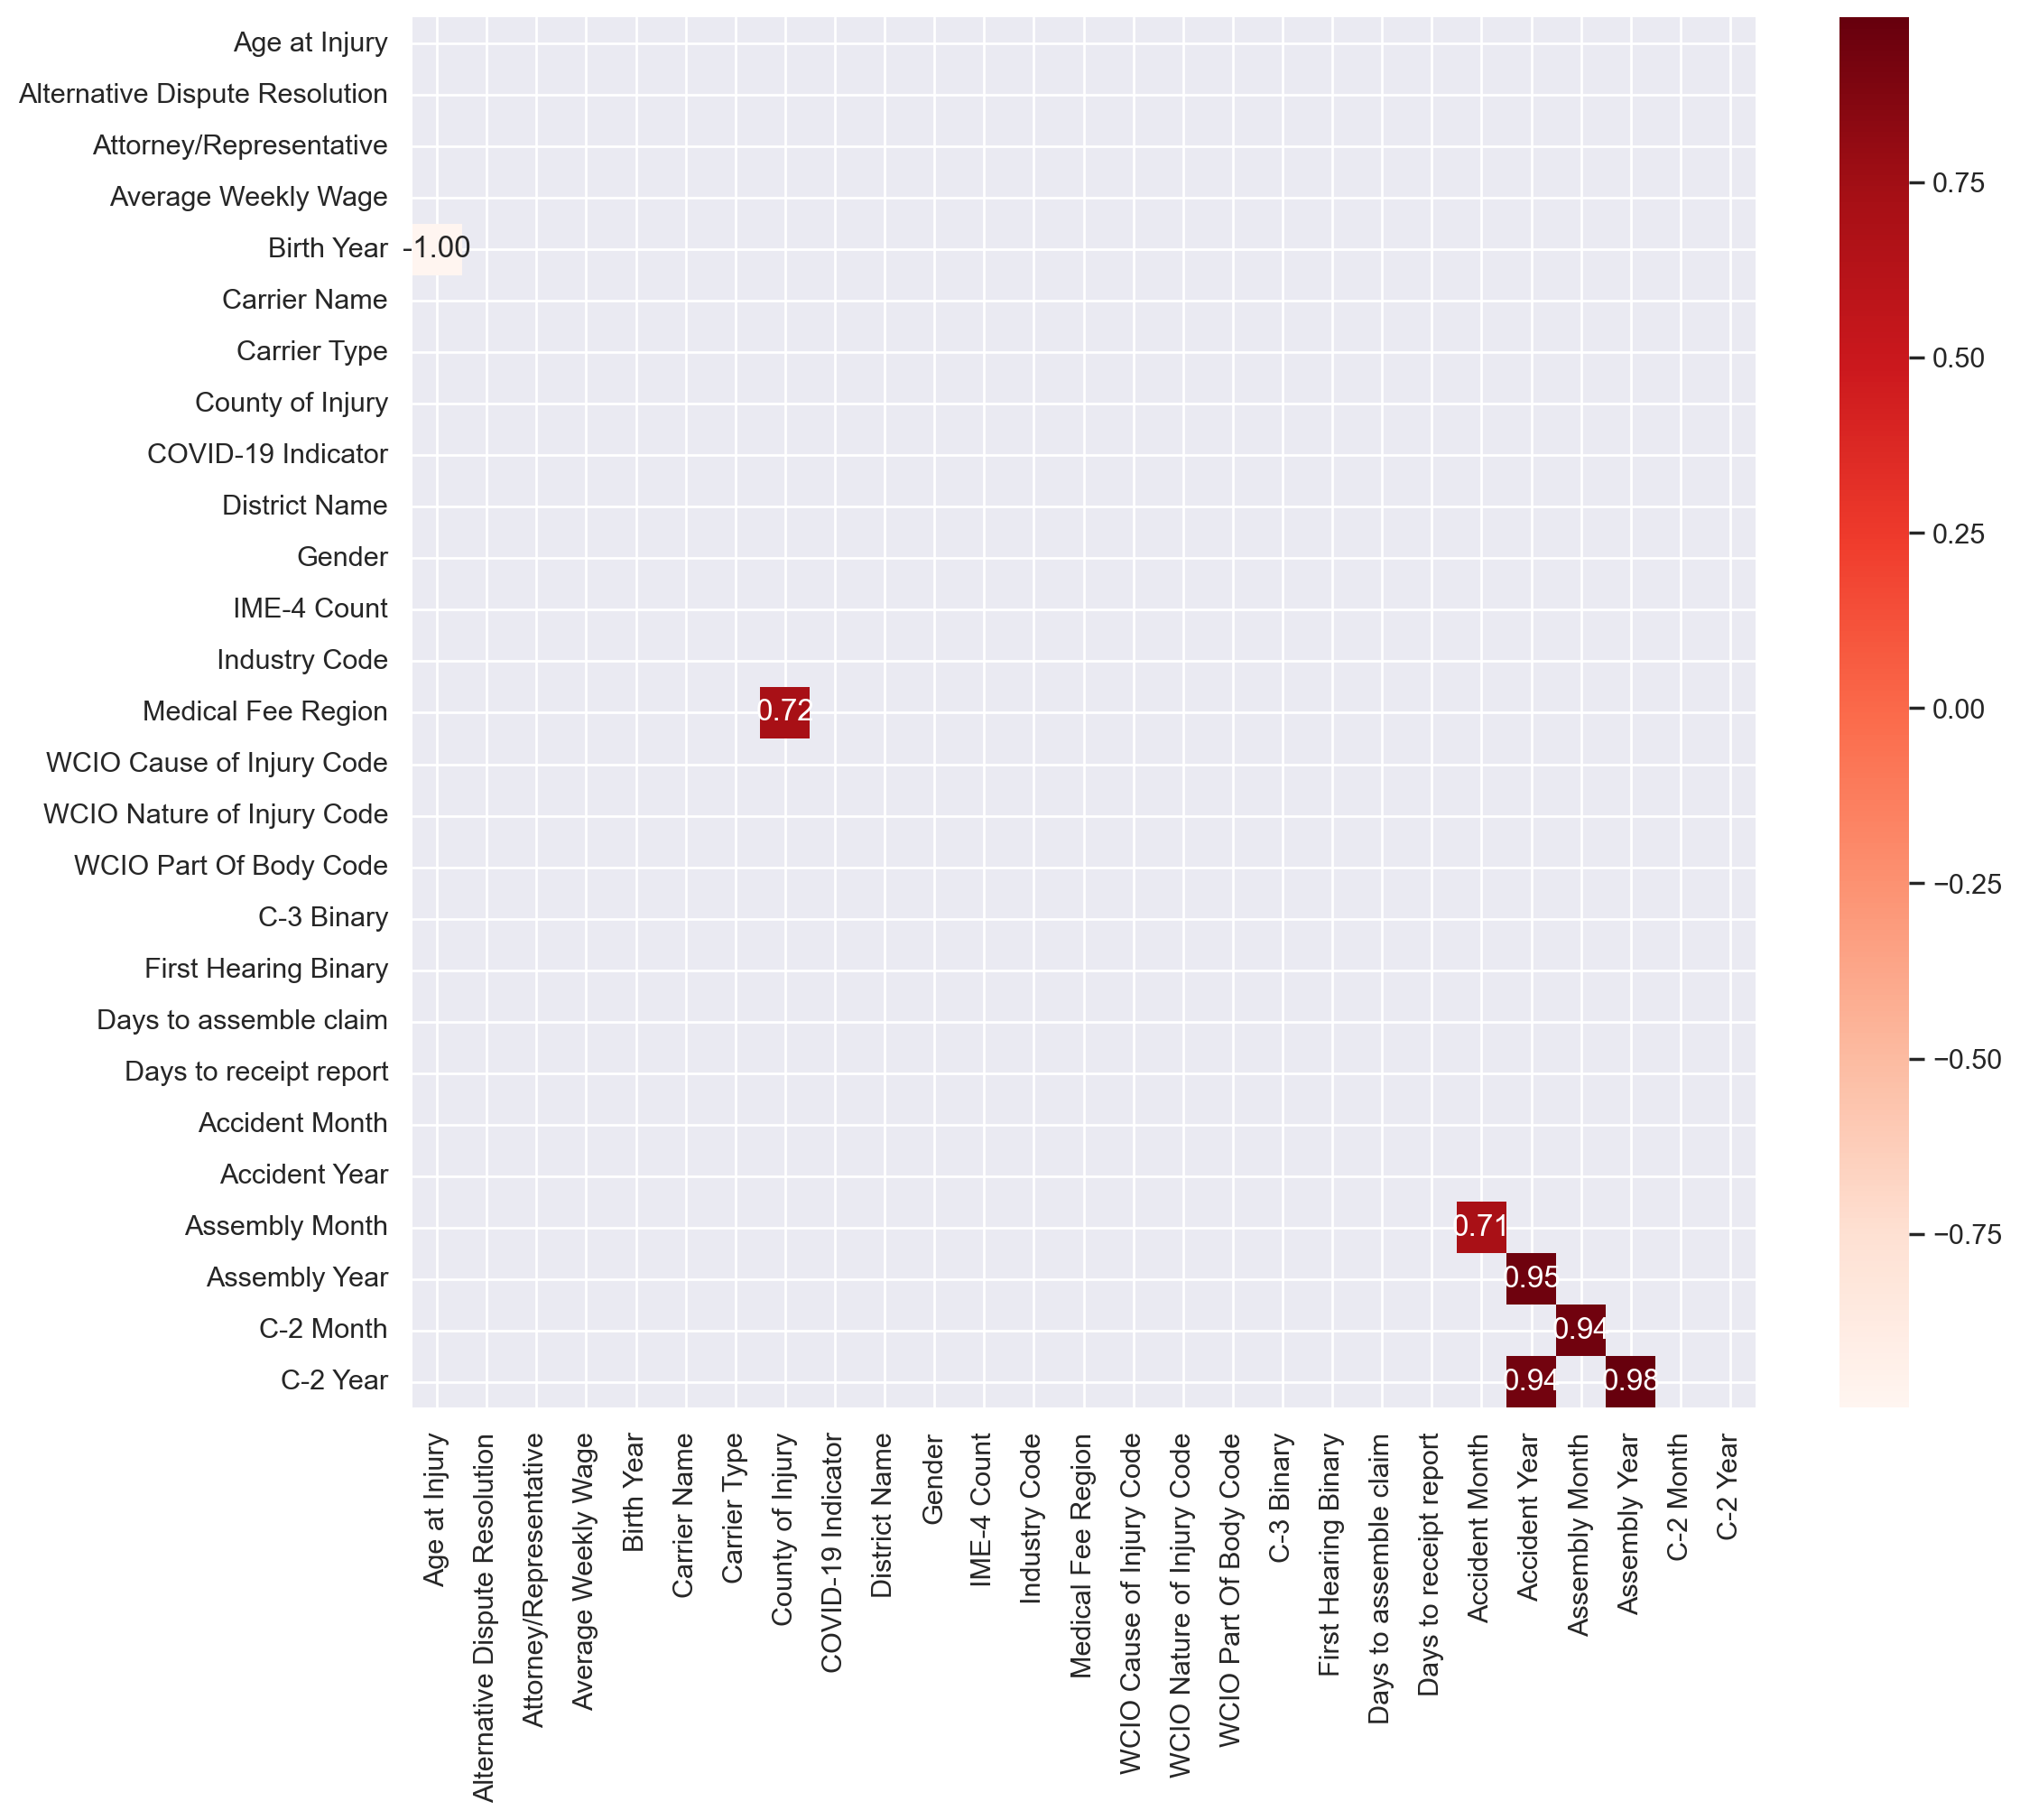

In [126]:
cor_spearman = X_train_scaled.corr(method ='spearman')
cor_heatmap(cor_spearman)

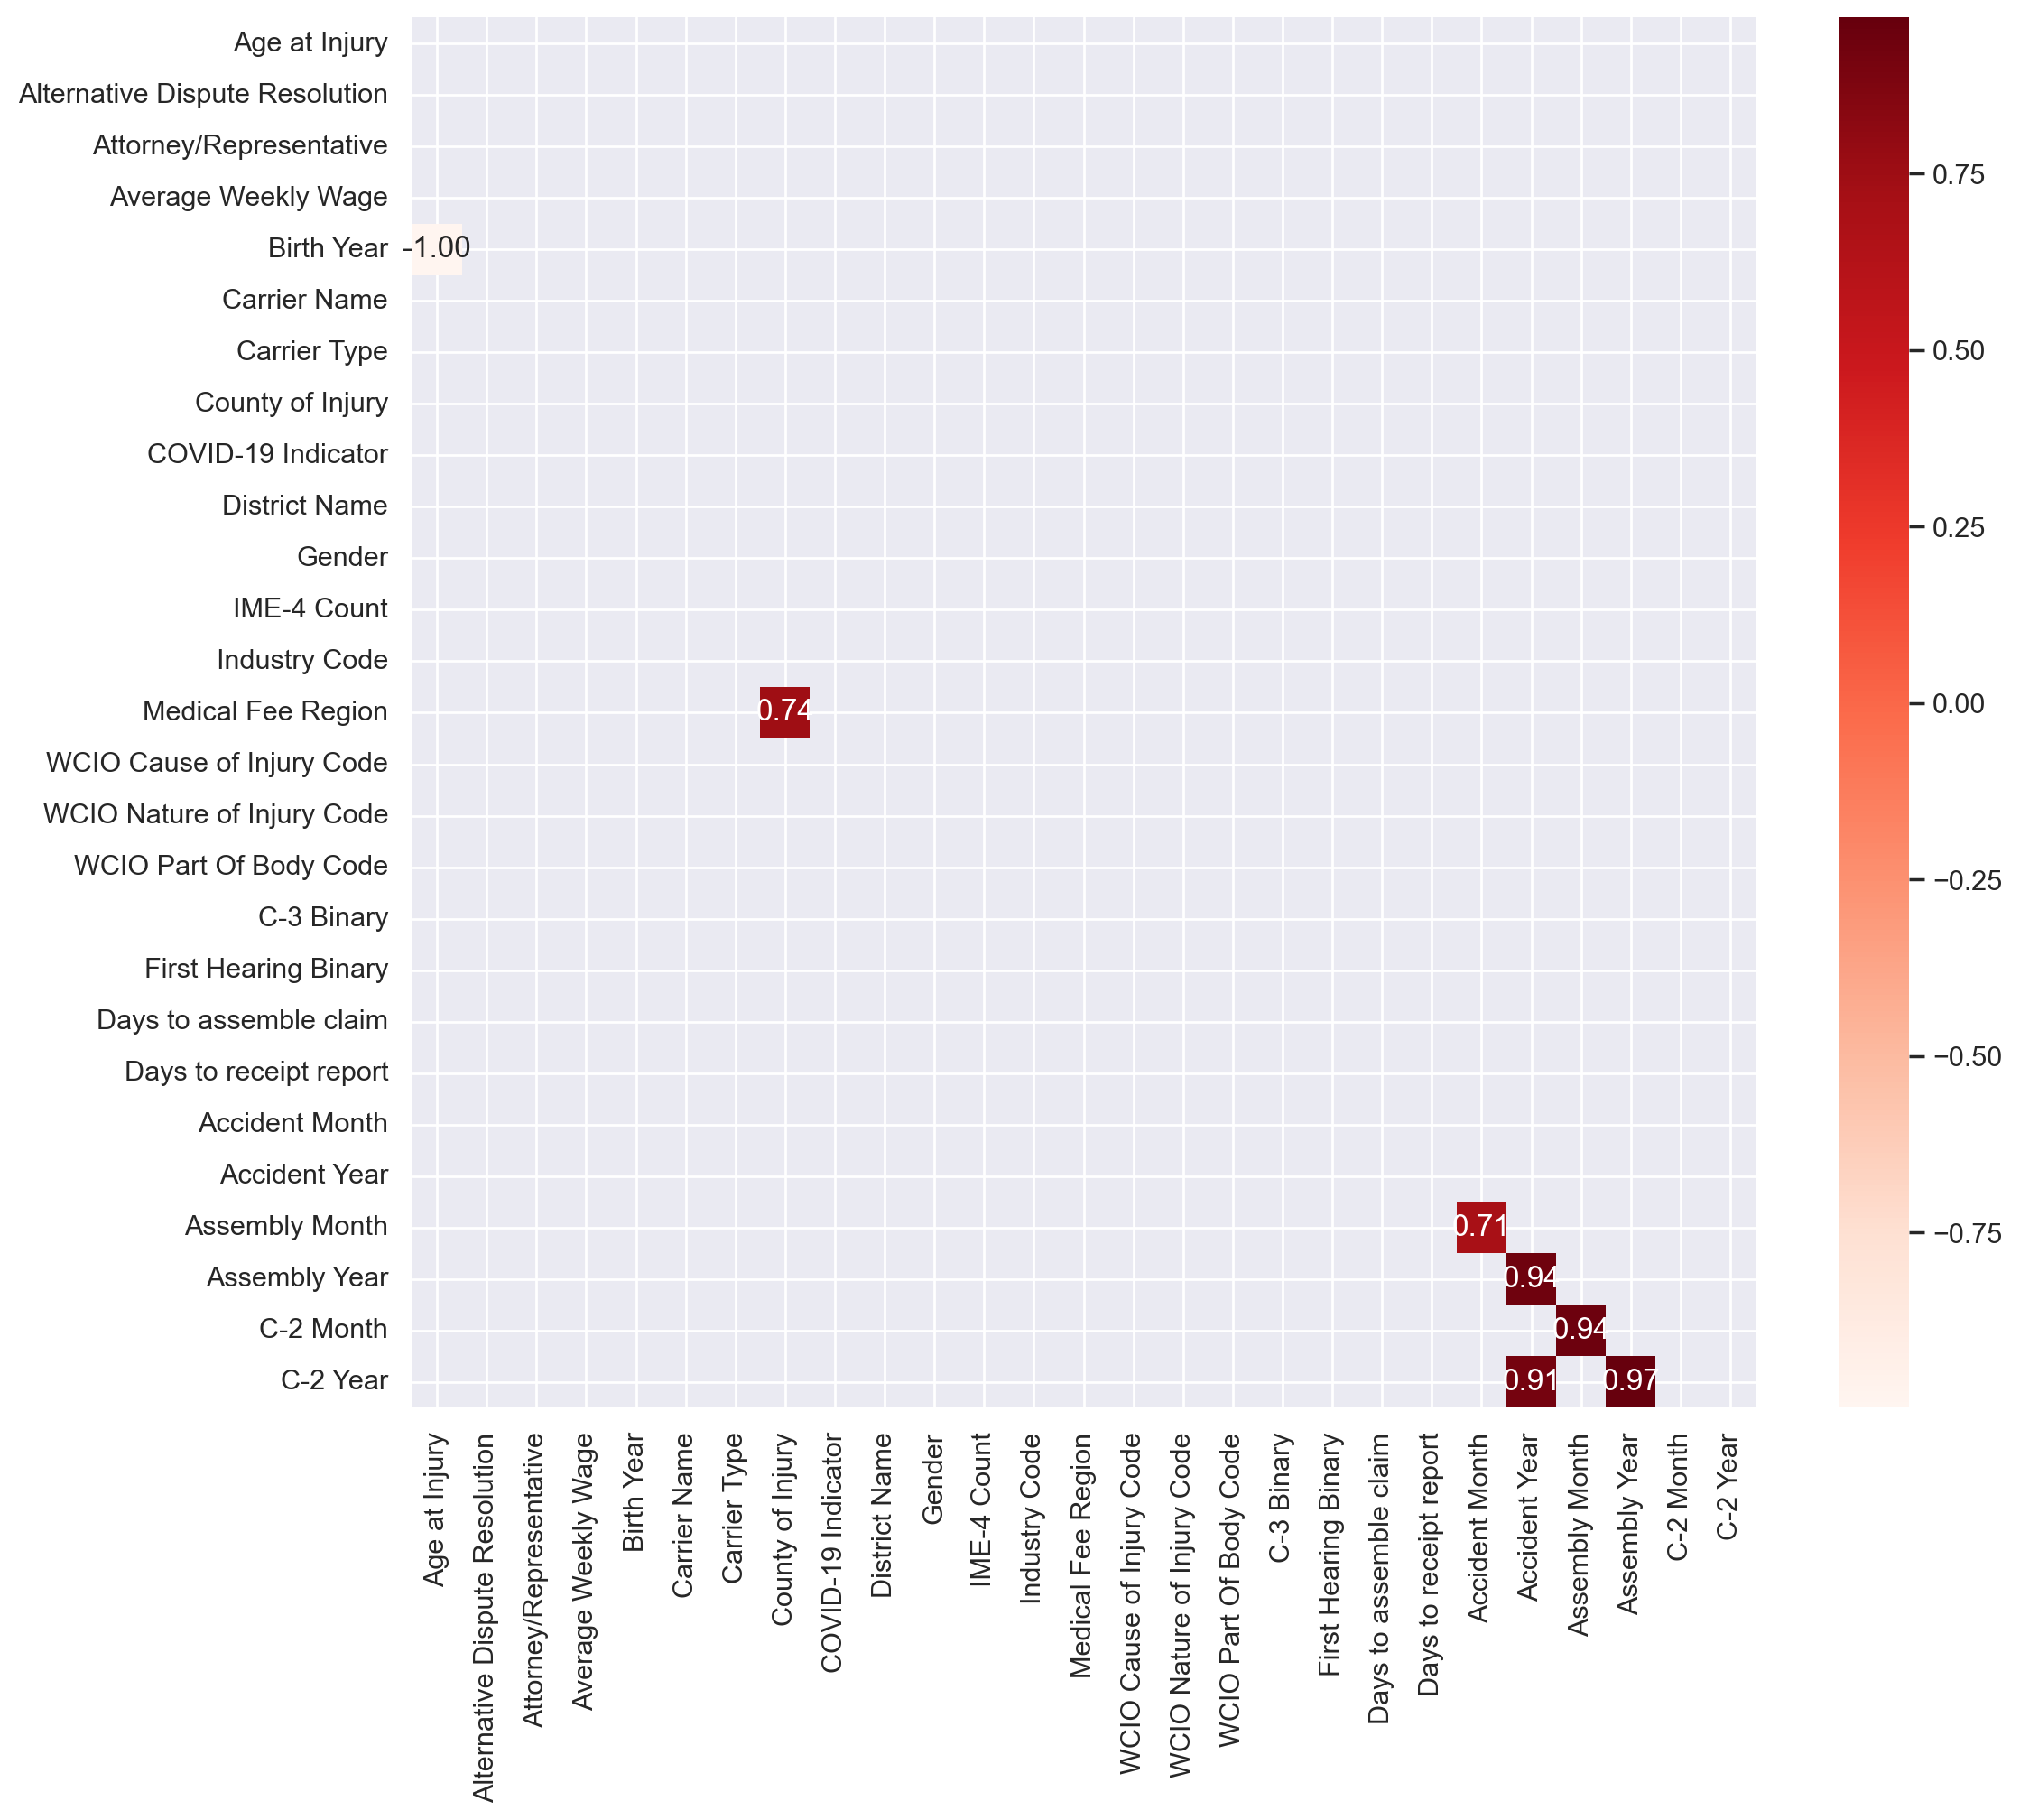

In [127]:
cor_pearson = X_train_scaled.corr(method = 'pearson')
cor_heatmap(cor_pearson)

In [128]:
def corr_pairs(corr, threshold):
    mask = np.tril(np.ones(corr.shape), k=-1).astype(bool)
    
    corr_lower = corr.where(mask)
    
    cor_pairs = corr_lower.unstack().dropna()
    cor_pairs = cor_pairs[(cor_pairs.abs() > threshold)]
    
    for pair, value in cor_pairs.items():
        print(f'Either we have | {pair[0]} | or | {pair[1]} |: {value:.2f}')

In [129]:
corr_pairs(cor_spearman, 0.75)

Either we have | Age at Injury | or | Birth Year |: -1.00
Either we have | Accident Year | or | Assembly Year |: 0.95
Either we have | Accident Year | or | C-2 Year |: 0.94
Either we have | Assembly Month | or | C-2 Month |: 0.94
Either we have | Assembly Year | or | C-2 Year |: 0.98


In [130]:
corr_pairs(cor_pearson, 0.75)

Either we have | Age at Injury | or | Birth Year |: -1.00
Either we have | Accident Year | or | Assembly Year |: 0.94
Either we have | Accident Year | or | C-2 Year |: 0.91
Either we have | Assembly Month | or | C-2 Month |: 0.94
Either we have | Assembly Year | or | C-2 Year |: 0.97


**We think we should drop:**
- `Birth Year`
- `C-2 Month`
- `C-2 Year`

In [131]:
selected_features_pearson = selected_features_spearman = ['Age at Injury', 'Alternative Dispute Resolution',
                                                        'Attorney/Representative', 'Average Weekly Wage',
                                                        'Carrier Name', 'Carrier Type', 'County of Injury',
                                                        'COVID-19 Indicator', 'District Name', 'Gender', 'IME-4 Count',
                                                        'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
                                                        'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
                                                        'Agreement Reached', 'C-3 Binary', 'First Hearing Binary',
                                                        'Days to assemble claim', 'Days to receipt report', 'Accident Month',
                                                        'Accident Year', 'Assembly Month', 'Assembly Year']

In [132]:
""" #no of features
nof_list=np.arange(1,14)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_scaled)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score)) """

' #no of features\nnof_list=np.arange(1,14)            \nhigh_score=0\n#Variable to store the optimum features\nnof=0           \ntrain_score_list =[]\nval_score_list = []\n\nfor n in range(len(nof_list)):\n    model = LogisticRegression()\n    \n    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])\n    X_train_rfe = rfe.fit_transform(X_train_scaled,y_train)\n    X_val_rfe = rfe.transform(X_val_scaled)\n    model.fit(X_train_rfe,y_train)\n    \n    #storing results on training data\n    train_score = model.score(X_train_rfe,y_train)\n    train_score_list.append(train_score)\n    \n    #storing results on training data\n    val_score = model.score(X_val_rfe,y_val)\n    val_score_list.append(val_score)\n    \n    #check best score\n    if(val_score >= high_score):\n        high_score = val_score\n        nof = nof_list[n]\nprint("Optimum number of features: %d" %nof)\nprint("Score with %d features: %f" % (nof, high_score)) '

In [133]:
model = LogisticRegression()

In [134]:
rfe = RFE(estimator = model, n_features_to_select = 13)

In [135]:
X_rfe = rfe.fit_transform(X = X_train_scaled, y = y_train)

In [136]:
X_rfe

array([[0.        , 0.        , 0.4109589 , ..., 0.13620387, 0.4       ,
        0.84615385],
       [1.        , 0.36595251, 0.31506849, ..., 0.13620387, 0.8       ,
        0.92307692],
       [0.        , 0.        , 0.91780822, ..., 0.13620387, 0.8       ,
        0.92307692],
       ...,
       [1.        , 0.28188842, 0.78082192, ..., 0.13620387, 0.8       ,
        0.92307692],
       [0.        , 0.        , 0.80821918, ..., 0.13639914, 0.8       ,
        0.92307692],
       [0.        , 0.58719926, 0.52054795, ..., 0.13620387, 0.6       ,
        0.88461538]])

In [137]:
rfe.support_

array([False, False,  True,  True,  True, False, False, False,  True,
       False, False,  True,  True,  True, False, False, False,  True,
        True,  True,  True, False,  True, False, False, False,  True])

In [138]:
rfe.ranking_

array([ 6, 15,  1,  1,  1, 14, 12, 11,  1,  7,  5,  1,  1,  1,  3,  4,  8,
        1,  1,  1,  1,  9,  1, 10,  2, 13,  1])

In [139]:
selected_features_rfe = pd.Series(rfe.support_, index=X_train_scaled.columns)

selected_features_rfe = selected_features_rfe[selected_features_rfe == True].index.to_list()

selected_features_rfe

['Attorney/Representative',
 'Average Weekly Wage',
 'Birth Year',
 'COVID-19 Indicator',
 'IME-4 Count',
 'Industry Code',
 'Medical Fee Region',
 'C-3 Binary',
 'First Hearing Binary',
 'Days to assemble claim',
 'Days to receipt report',
 'Accident Year',
 'C-2 Year']

In [140]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

feature_importances = pd.Series(model.feature_importances_, index=X_train_scaled.columns)

mean_importance = feature_importances.mean()
selected_features_dt = feature_importances[feature_importances > mean_importance].index.to_list()

selected_features_dt

['Attorney/Representative',
 'Average Weekly Wage',
 'Carrier Name',
 'Industry Code',
 'WCIO Cause of Injury Code',
 'WCIO Part Of Body Code',
 'Days to assemble claim']

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

mean_importance = model.feature_importances_.mean()
threshold_value = mean_importance

selector = SelectFromModel(model, threshold=threshold_value, prefit=True)
selected_features = X_train_scaled.columns[(selector.get_support())]

selected_features_rf = selected_features.to_list()

selected_features_rf

['Age at Injury',
 'Attorney/Representative',
 'Average Weekly Wage',
 'Birth Year',
 'Carrier Name',
 'IME-4 Count',
 'WCIO Cause of Injury Code',
 'WCIO Part Of Body Code',
 'First Hearing Binary',
 'Days to assemble claim']

In [142]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [143]:
reg = LassoCV()

In [144]:
reg.fit(X_train_scaled, y_train)

LassoCV()

In [145]:
coef = pd.Series(reg.coef_, index = X_train_scaled.columns)
coef

Age at Injury                     0.016339
Alternative Dispute Resolution   -0.000000
Attorney/Representative           0.551660
Average Weekly Wage               2.566631
Birth Year                       -0.000000
Carrier Name                      0.039058
Carrier Type                     -0.023843
County of Injury                  0.032061
COVID-19 Indicator               -0.130977
District Name                     0.139844
Gender                           -0.006417
IME-4 Count                       0.589018
Industry Code                     0.018583
Medical Fee Region               -0.132551
WCIO Cause of Injury Code        -0.131535
WCIO Nature of Injury Code       -0.026889
WCIO Part Of Body Code            0.054030
C-3 Binary                        0.094197
First Hearing Binary              0.208068
Days to assemble claim           -0.677835
Days to receipt report           -0.000000
Accident Month                   -0.000000
Accident Year                     0.000000
Assembly Mo

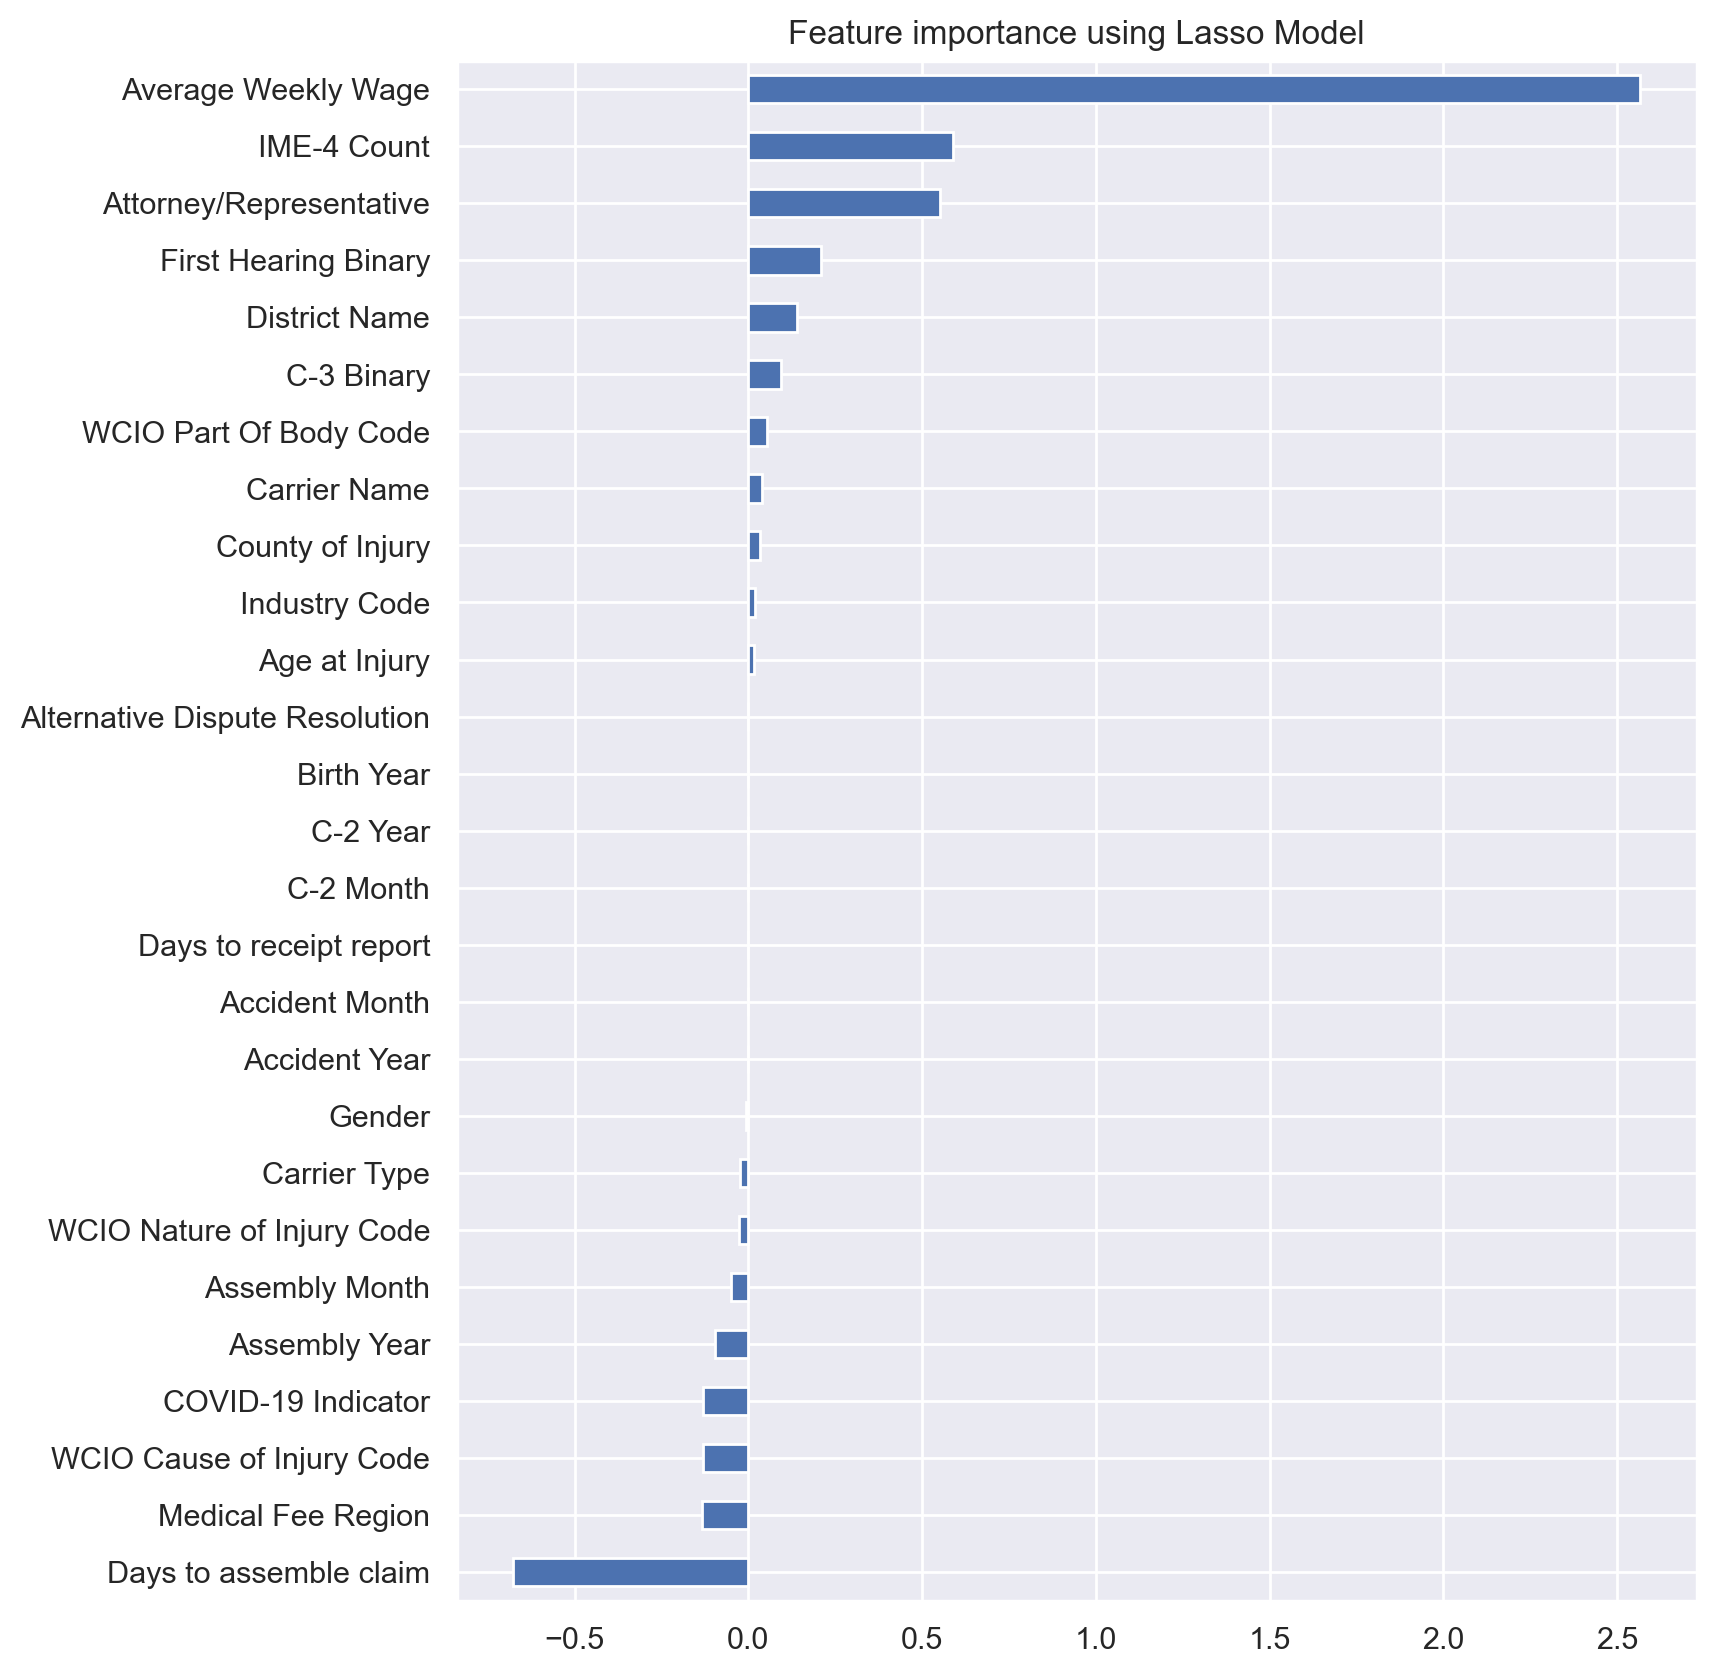

In [146]:
plot_importance(coef,'Lasso')

In [147]:
selected_features_lasso = coef[coef.abs() > 0.05].index.to_list()

if "Average Weekly Wage" in selected_features_lasso:
    selected_features_lasso.remove("Average Weekly Wage")

selected_features_lasso

['Attorney/Representative',
 'COVID-19 Indicator',
 'District Name',
 'IME-4 Count',
 'Medical Fee Region',
 'WCIO Cause of Injury Code',
 'WCIO Part Of Body Code',
 'C-3 Binary',
 'First Hearing Binary',
 'Days to assemble claim',
 'Assembly Year']

In [148]:
data = {'Feature': X_train_scaled.columns}

data['Pearson'] = ['Keep' if feature in selected_features_pearson else 'Discard' for feature in X_train_scaled.columns]
data['Spearman'] = ['Keep' if feature in selected_features_spearman else 'Discard' for feature in X_train_scaled.columns]
data['LASSO'] = ['Keep' if feature in selected_features_lasso else 'Discard' for feature in X_train_scaled.columns]
data['RFE'] = ['Keep' if feature in selected_features_rfe else 'Discard' for feature in X_train_scaled.columns]
data['DT'] = ['Keep' if feature in selected_features_dt else 'Discard' for feature in X_train_scaled.columns]
data['RandomForest'] = ['Keep' if feature in selected_features_rf else 'Discard' for feature in X_train_scaled.columns]

df = pd.DataFrame(data)
df['Result'] = df.iloc[:, 1:7].apply(lambda x: 'Keep' if list(x).count('Keep') >= 3 else 'Discard', axis=1)

feature_selection = df[df['Result'] == 'Keep']['Feature'].tolist()

def color_cells(val):
    color = 'lightgreen' if val == 'Keep' else 'lightcoral'
    return f'background-color: {color}'

styled_df = df.style.applymap(color_cells, subset=df.columns[1:])

styled_df

,Feature,Pearson,Spearman,LASSO,RFE,DT,RandomForest,Result
0,Age at Injury,Keep,Keep,Discard,Discard,Discard,Keep,Keep
1,Alternative Dispute Resolution,Keep,Keep,Discard,Discard,Discard,Discard,Discard
2,Attorney/Representative,Keep,Keep,Keep,Keep,Keep,Keep,Keep
3,Average Weekly Wage,Keep,Keep,Discard,Keep,Keep,Keep,Keep
4,Birth Year,Discard,Discard,Discard,Keep,Discard,Keep,Discard
5,Carrier Name,Keep,Keep,Discard,Discard,Keep,Keep,Keep
6,Carrier Type,Keep,Keep,Discard,Discard,Discard,Discard,Discard
7,County of Injury,Keep,Keep,Discard,Discard,Discard,Discard,Discard
8,COVID-19 Indicator,Keep,Keep,Keep,Keep,Discard,Discard,Keep
9,District Name,Keep,Keep,Keep,Discard,Discard,Discard,Keep


In [149]:
X_train_scaled_fs = X_train_scaled[feature_selection]
X_val_scaled_fs = X_val_scaled[feature_selection]
X_test_scaled_fs = X_test_scaled[feature_selection]

In [150]:
modelKNN = KNeighborsClassifier()

In [151]:
modelKNN.fit(X = X_train_scaled_fs, y = y_train)

KNeighborsClassifier()

In [152]:
labels_train = modelKNN.predict(X_train_scaled_fs)
labels_val = modelKNN.predict(X_val_scaled_fs)
labels_train

array([2, 4, 2, ..., 4, 2, 4], dtype=int64)

In [153]:
modelKNN.predict_proba(X_val_scaled_fs)

array([[0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0.6, 0. , ..., 0. , 0. , 0. ],
       [0. , 0.6, 0.4, ..., 0. , 0. , 0. ],
       ...,
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ]])

In [154]:
print(modelKNN.score(X_train_scaled_fs, y_train))

0.7926162747132727


In [155]:
print(modelKNN.score(X_val_scaled_fs, y_val))

0.5699033237528043


In [156]:
model_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)

model_rf.fit(X_train_scaled_fs, y_train)

y_pred = model_rf.predict(X_val_scaled_fs)

accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

y_pred_test = model_rf.predict(X_test_scaled_fs)


Accuracy: 0.56
Confusion Matrix:
[[    6   821   225     3     1     0     0     1]
 [   24 53742  2398    42     8     0     0     1]
 [   12  9199  4104   313    59     0     0     1]
 [   30 13156 12446  3396   442     0     0     1]
 [    6  2207  5974   838   591     0     0     0]
 [    0    22   525   226    59     0     0     0]
 [    0     3    10     4     2     0     0     0]
 [    0    29    42    20     0     0     0     0]]

Classification Report:
              precision    recall  f1-score   support

           1       0.08      0.01      0.01      1057
           2       0.68      0.96      0.79     56215
           3       0.16      0.30      0.21     13688
           4       0.70      0.12      0.20     29471
           5       0.51      0.06      0.11      9616
           6       0.00      0.00      0.00       832
           7       0.00      0.00      0.00        19
           8       0.00      0.00      0.00        91

    accuracy                           0.56   

In [159]:
wcb_test.columns

Index(['Age at Injury', 'Alternative Dispute Resolution',
       'Attorney/Representative', 'Average Weekly Wage', 'Birth Year',
       'Carrier Name', 'Carrier Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'Gender', 'IME-4 Count',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'C-3 Binary',
       'First Hearing Binary', 'Days to assemble claim',
       'Days to receipt report', 'Accident Month', 'Accident Year',
       'Assembly Month', 'Assembly Year', 'C-2 Month', 'C-2 Year'],
      dtype='object')

In [161]:
index_csv

0         6165911
1         6166141
2         6165907
3         6166047
4         6166102
           ...   
387970    6553137
387971    6553119
387972    6553542
387973    6553455
387974    6553594
Name: Claim Identifier, Length: 387975, dtype: int64

In [160]:
y_pred_test_series = pd.Series(y_pred_test)

y_pred_test_series.index = index_csv.values

y_pred_test_series.to_csv("y_pred.csv", index_label="Claim Identifier")

print("Arquivo exportado como y_pred_test_with_index.csv")

ValueError: Length mismatch: Expected axis has 375490 elements, new values have 387975 elements

In [ ]:
# Exportar a contagem de valores para um arquivo CSV
value_counts.to_csv("y_pred_test_value_counts.csv", header=["Count"], index_label="Value")

print("Arquivo exportado como y_pred_test_value_counts.csv")


Arquivo exportado como y_pred_test_value_counts.csv
